# Setup

In [1]:
library(here)

source(here::here("Processing","helpers.R") )

seed_num <- 42L


export.path_graphs <- here::here("Figure_Creation","Figures")
dir.create(file.path(export.path_graphs), showWarnings = FALSE,recursive=TRUE)

export.path_objects <- here::here("Processing","results","Objects")

here() starts at /home/pmajev/Kishor_Septoclasts/for_github

Loading required package: Seurat

Attaching SeuratObject

Loading required package: devtools

Loading required package: usethis

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

Loading required package: Matrix

Loading required package: scales

Loading required package: ensembldb

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, 

In [2]:
cell_cycle_cols <- c(G1="#FFC312",G2M="#de5421",S="#12CBC4")

In [3]:
stromal_cell_type_colors <- c("Septoclasts"="#E64B35FF","OB"="#c2a451","dpMSC1"="#638475","dpMSC2"="#90E39A","mpMSC"="#42c2f5","pMSC"="#00A087FF")
prismatic::color(stromal_cell_type_colors)

<colors>
#E64B35FF #C2A451FF #638475FF #90E39AFF #42C2F5FF #00A087FF 

In [4]:
stromal_cell_type_colors_reduced <- c("OB"="#c2a451","dpMSC"="#638475","mpMSC"="#42c2f5","aEC"="#8491B4FF","mpEC"="#4DBBD5FF","bmEC"="#00A087FF","pEC"="darkred")
prismatic::color(stromal_cell_type_colors_reduced)

<colors>
#C2A451FF #638475FF #42C2F5FF #8491B4FF #4DBBD5FF #00A087FF #8B0000FF 

In [5]:
merged_cell_type_colors <- c("pvMSC"="#f0a500","Septoclasts"="#E64B35FF","Bone Cells"="#c2a451","aEC"="#8491B4FF","mpEC"="#4DBBD5FF","bmEC"="#00A087FF")
prismatic::color(merged_cell_type_colors)

<colors>
#F0A500FF #E64B35FF #C2A451FF #8491B4FF #4DBBD5FF #00A087FF 

# Load Data

## Full Septoclast Dataset

In [6]:
seurat_septoclasts <- readRDS(paste0(export.path_objects,"/Septoclasts_clustered.Rds"))

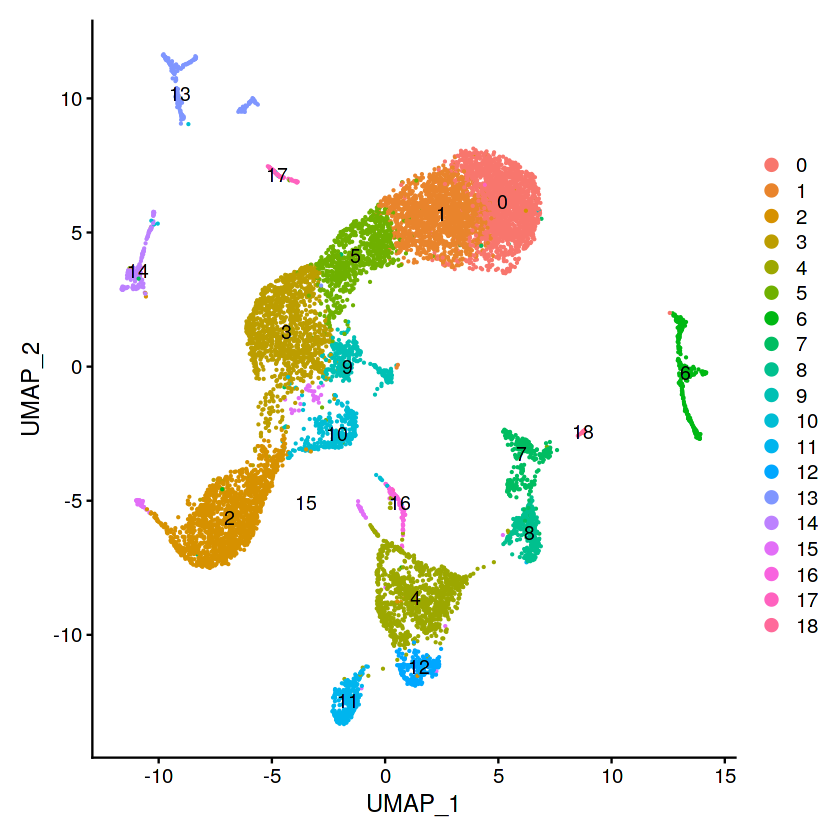

In [7]:
DimPlot(seurat_septoclasts,label=TRUE)

## Focus on Septoclasts

In [8]:
seurat_stromal_subset <- readRDS(paste0(export.path_objects,"/Septoclasts_subset.Rds"))

[1] dpMSC1      dpMSC2      mpMSC       Septoclasts OB          pMSC       
Levels: dpMSC1 dpMSC2 mpMSC Septoclasts pMSC OB

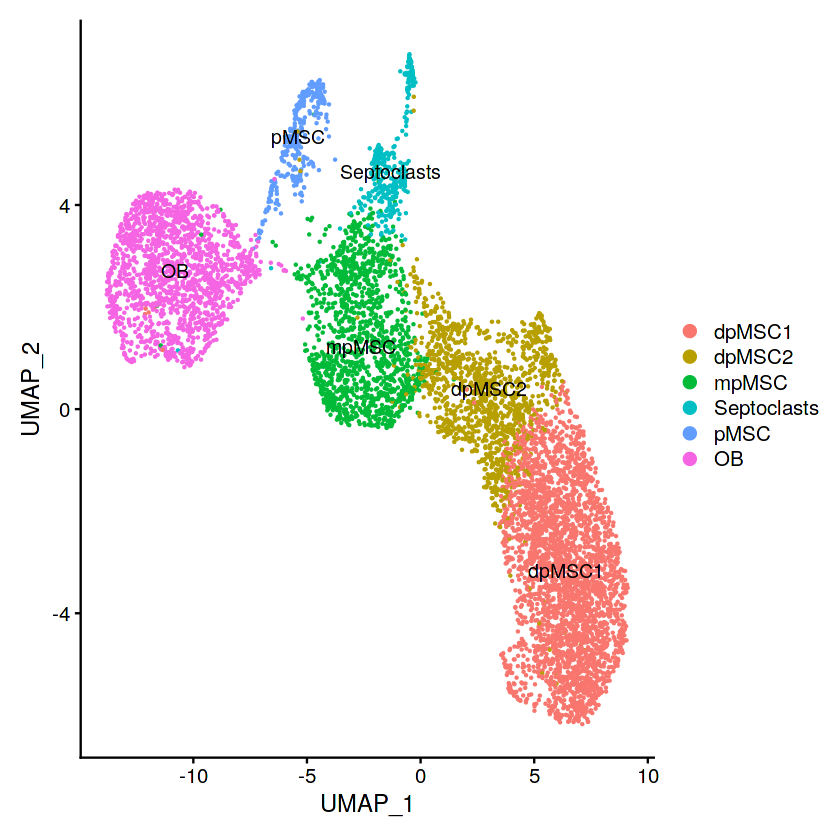

In [9]:
unique(seurat_stromal_subset@meta.data$final_cell_type)
DimPlot(seurat_stromal_subset,label=TRUE)

## Full metaphyseal Dataset

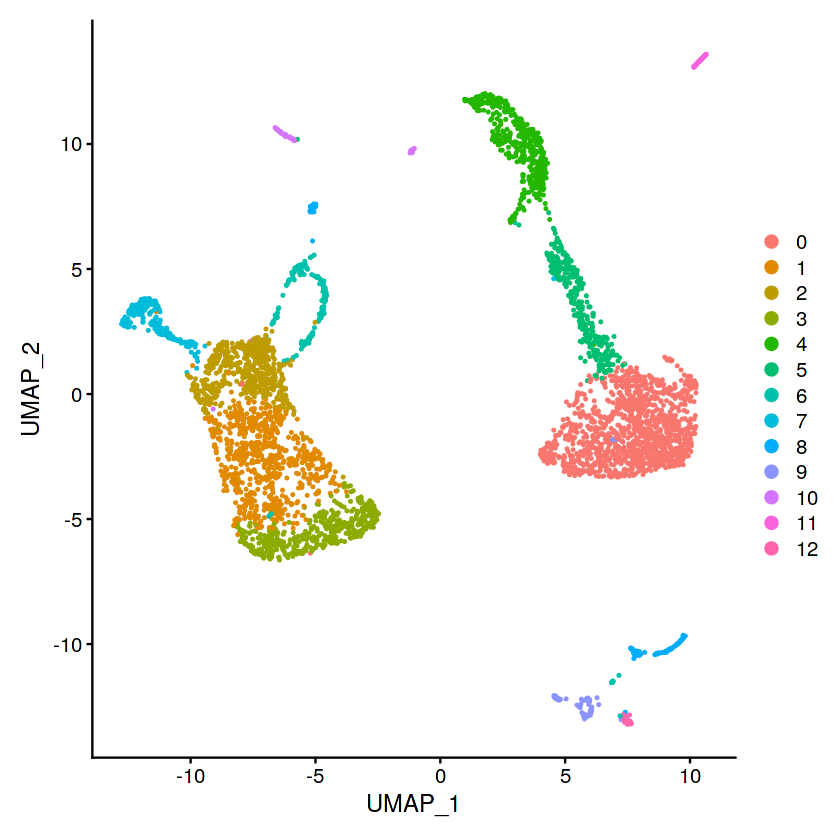

In [10]:
seurat_stromal_all <- readRDS(paste0(export.path_objects,"/Mp_merged.Rds"))

DimPlot(seurat_stromal_all)

## Focus on metaphyseal EC and MSC

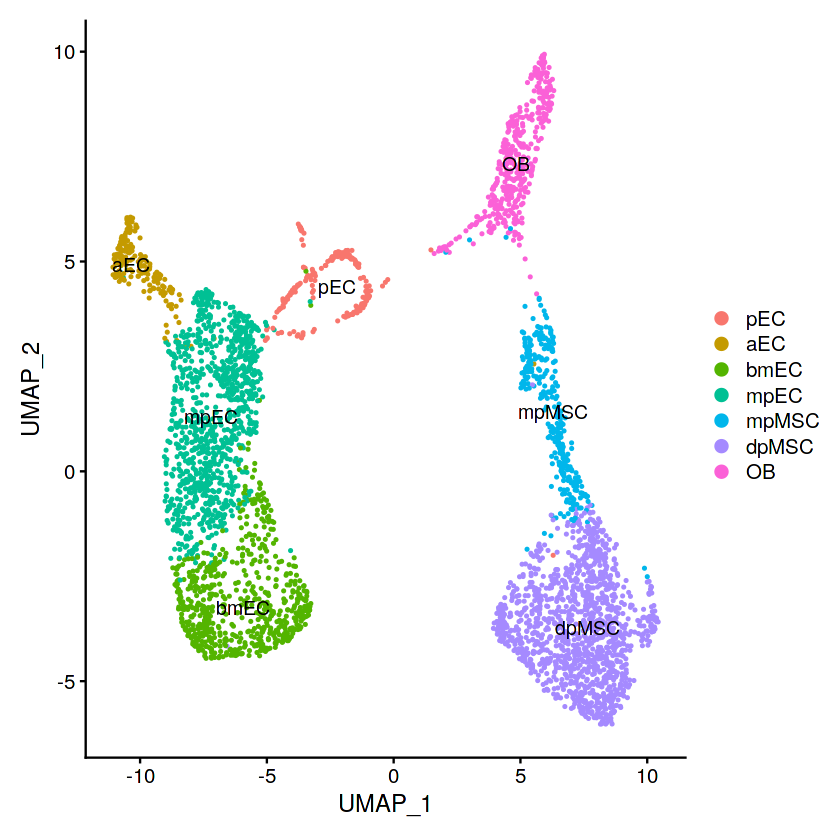

In [11]:
seurat_stromal <- readRDS(paste0(export.path_objects,"/Mp_merged_subset.Rds"))

DimPlot(seurat_stromal,label=TRUE)

## Full merged Dataset

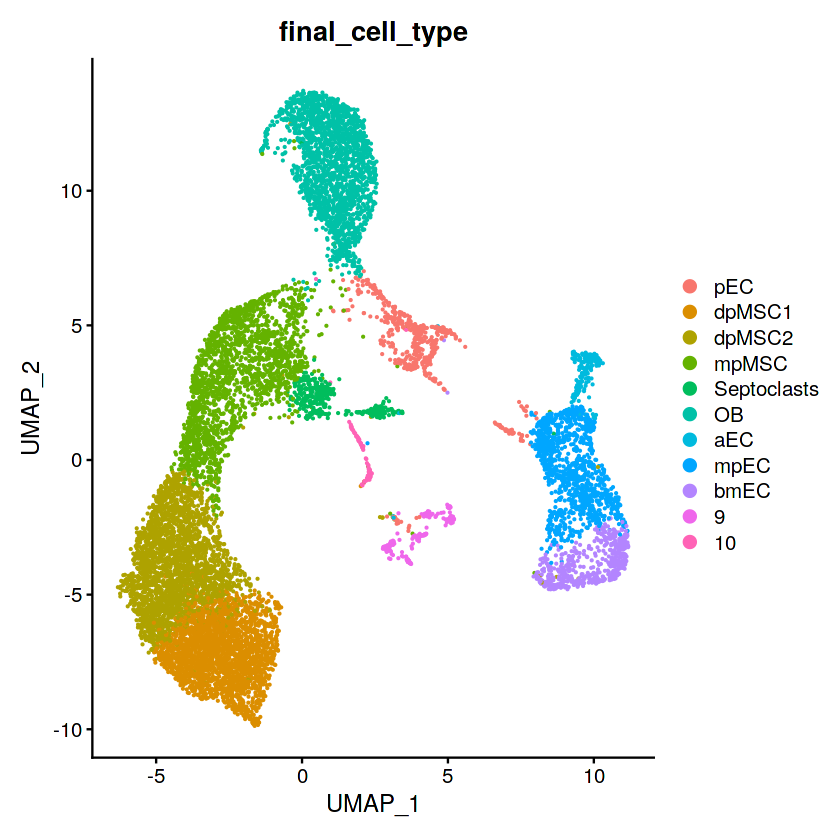

In [12]:
seurat_merged_all <- readRDS(paste0(export.path_objects,"/Integrated.Rds"))

DimPlot(seurat_merged_all,group.by="final_cell_type")

## Merged Focus on metaphyseal EC, Bone Cells, MSC and Septoclasts

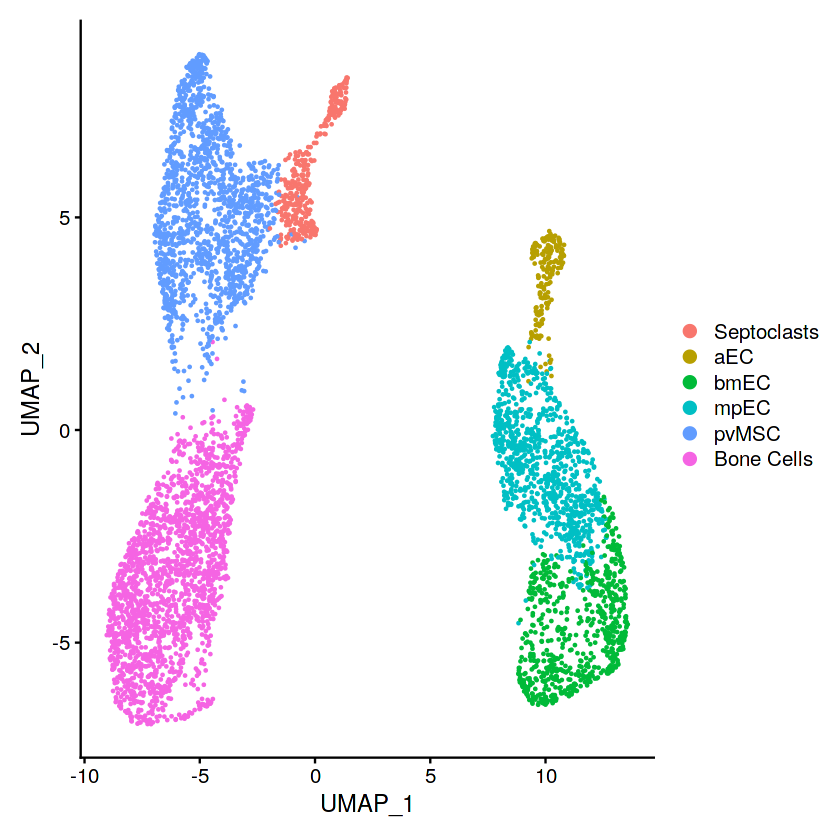

In [13]:
seurat_all_integrated <- readRDS(paste0(export.path_objects,"/Integrated_focused_subset_withBoneCells.Rds"))

DimPlot(seurat_all_integrated)

# Main Figures

## Figure 2b

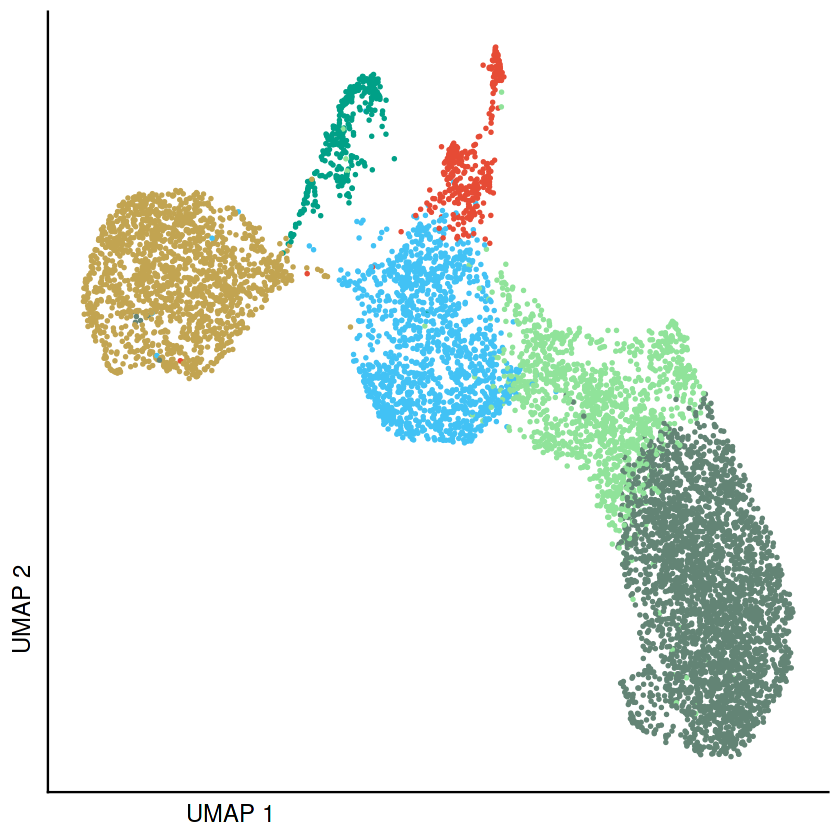

In [14]:
Figure_2b <- UMAP_Plot(seurat_stromal_subset,
          pt.size=0.5,
          reduction="umap", 
          group.by="final_cell_type",
          split.by=NA,
          facet_labels=NA,
          border_col=NA,
          colors=stromal_cell_type_colors,
          legend=FALSE,
          tick_labels=FALSE,
          n.row=1,
          n.col=NA,
          x.axis_label=TRUE,
          y.axis_label=TRUE,
          x.axis_line=TRUE,
          y.axis_line=TRUE)

Figure_2b

ggsave(here::here(export.path_graphs,"Figure_2b.pdf"),Figure_2b, width=5, height=5, limitsize=F)

## Figure 2c

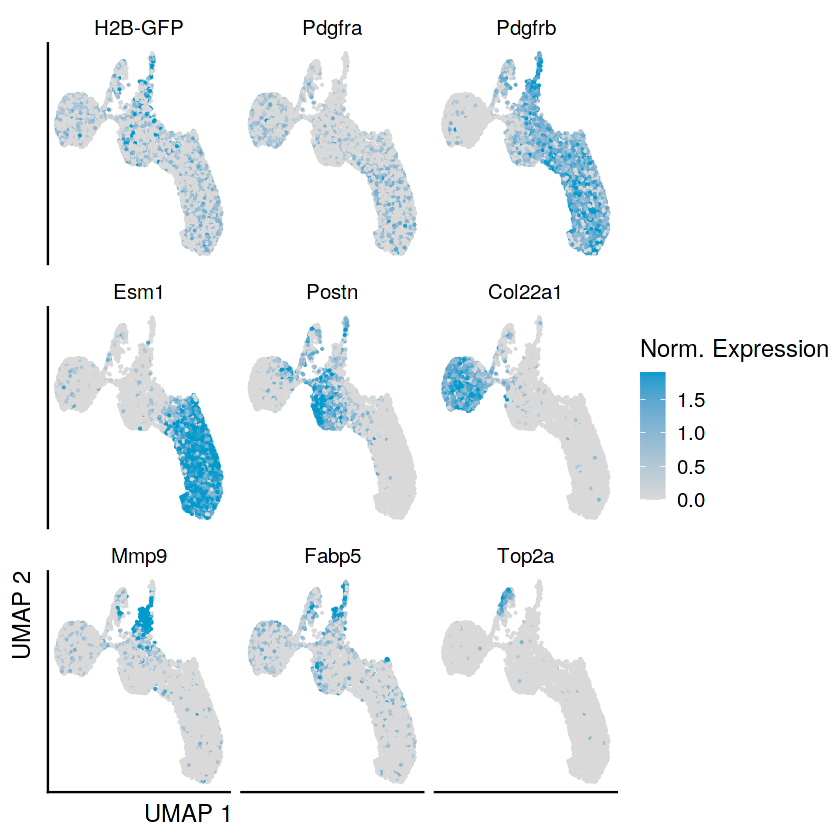

In [15]:
Figure_2c <- Feature_Plot(seurat_stromal_subset,
                          pt.size=0.1,
                          scale.label="Norm. Expression",
                          features=c("H2B-GFP","Pdgfra","Pdgfrb","Esm1","Postn","Col22a1","Mmp9","Fabp5","Top2a"),
                          split.by=NA,
                          legend=TRUE,
                          tick_labels=FALSE,
                          use_assay="RNA",
                          use_slot="data",
                          n.row=3,
                          n.col=3,
                          color_lower="grey85",
                          color_upper="deepskyblue3",
                          max.cutoff="q95",
                          min.cutoff=0,
                          reduction="umap")

Figure_2c

ggsave(here::here(export.path_graphs,"Figure_2c.pdf"),Figure_2c, width=15, height=10, limitsize=F)

## Figure 2d + e + f

In [16]:
library(monocle)
cds_stromal <- readRDS(file=paste0(export.path_objects,"/Monocle2_Septoclast_subset.Rds"))

Loading required package: VGAM

Loading required package: splines


Attaching package: 'VGAM'


The following object is masked from 'package:tidyr':

    fill


Loading required package: DDRTree


Attaching package: 'monocle'


The following object is masked from 'package:scran':

    clusterCells




Warning message:
"`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated."
Scale for 'colour' is already present. Adding another scale for 'colour', which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour', which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour', which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour', which will replace the existing scale.



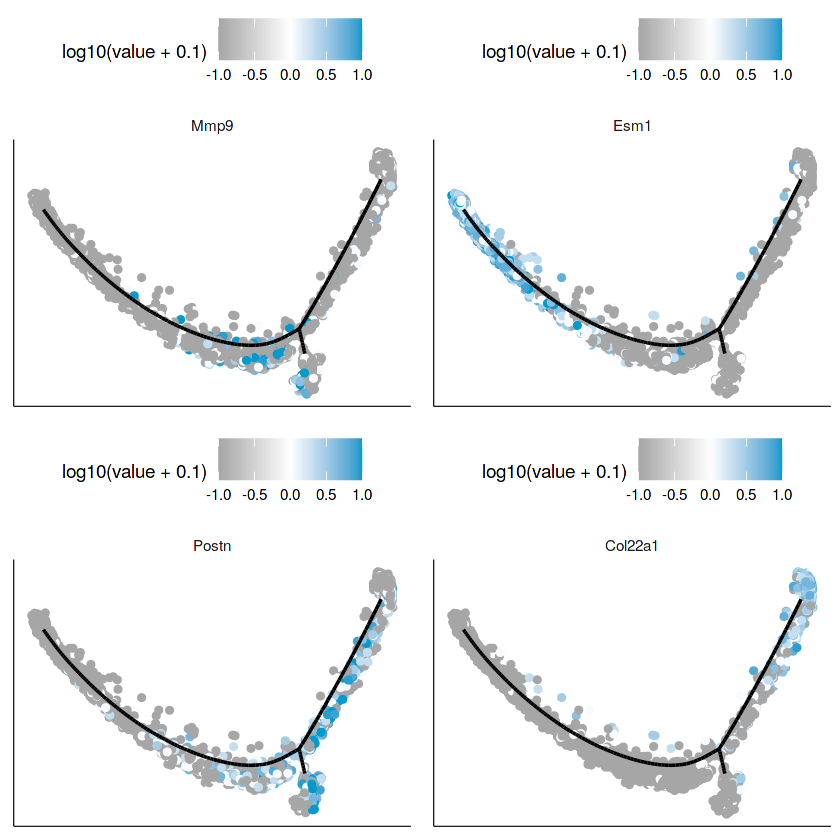

In [17]:
combined_monocle_trajectory <- plot_cell_trajectory(cds_stromal, color_by = "clustername",theta = 180,show_branch_points=FALSE) + scale_color_manual(values = stromal_cell_type_colors, name = "cluster") +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank())

combined_monocle_trajectory_split <- plot_cell_trajectory(cds_stromal, color_by = "clustername",theta = 180,show_branch_points=FALSE) + 
scale_color_manual(values = stromal_cell_type_colors, name = "cluster") +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + facet_wrap(~clustername)


combined_monocle_trajectory_genes <- plot_grid(
    plot_cell_trajectory(cds_stromal,theta = 180,use_color_gradient=TRUE,markers="Mmp9",show_branch_points=FALSE) +
      scale_colour_gradient2(low="grey65",high="deepskyblue3",mid="white",midpoint=0,limits=c(-1,1),oob=squish)+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()),
    plot_cell_trajectory(cds_stromal,theta = 180,use_color_gradient=TRUE,markers="Esm1",show_branch_points=FALSE) +
      scale_colour_gradient2(low="grey65",high="deepskyblue3",mid="white",midpoint=0,limits=c(-1,1),oob=squish)+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()),
    plot_cell_trajectory(cds_stromal,theta = 180,use_color_gradient=TRUE,markers="Postn",show_branch_points=FALSE) +
      scale_colour_gradient2(low="grey65",high="deepskyblue3",mid="white",midpoint=0,limits=c(-1,1),oob=squish)+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()),
    plot_cell_trajectory(cds_stromal,theta = 180,use_color_gradient=TRUE,markers="Col22a1",show_branch_points=FALSE) +
      scale_colour_gradient2(low="grey65",high="deepskyblue3",mid="white",midpoint=0,limits=c(-1,1),oob=squish)+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()),
    nrow=2,ncol=2
    )


ggsave(here::here(export.path_graphs,"Figure_2d.pdf"),combined_monocle_trajectory, width=5, height=5, limitsize=F)
ggsave(here::here(export.path_graphs,"Figure_2e.pdf"),combined_monocle_trajectory_split, width=10, height=10, limitsize=F)
ggsave(here::here(export.path_graphs,"Figure_2f.pdf"),combined_monocle_trajectory_genes , width=10, height=10, limitsize=F)


combined_monocle_trajectory_genes

## Figure 3a

In [18]:
DE_table <- FindMarkers(object = seurat_stromal_subset, ident.1= "Septoclasts",ident.2=NULL,only.pos = FALSE, min.diff.pct = -Inf, min.pct = 0, logfc.threshold = log2(x = 1), test.use = "wilcox",assay="RNA",verbose = TRUE, slot = "counts")

In [19]:
DE_table_df <- DE_table %>% rownames_to_column(var="gene")
DE_table_df$sig <- DE_table_df$p_val_adj < 0.01 & abs(DE_table_df$avg_log2FC) >=  log2(2)

DE_table_df$sig <- replace_na(DE_table_df$sig,"FALSE")

In [20]:
######CellScatter#####
average_expression <- (AverageExpression(seurat_stromal_subset, return.seurat = FALSE,assay="RNA",slot="data"))$RNA %>% as.data.frame() %>% rownames_to_column(var="gene")

goi <- c("Mmp9","Fabp5","Mmp13","Mmp14")

subset_matrix <- as.matrix(average_expression[,c("OB", "pMSC","mpMSC","dpMSC1","dpMSC1")])

In [21]:
average_expression$cluster_mean <- rowMeans(subset_matrix, na.rm=FALSE)
average_expression <- average_expression %>% dplyr::left_join(DE_table_df,by="gene") %>% dplyr::select(gene,Septoclasts,cluster_mean,sig)
average_expression$sig <- replace_na(average_expression$sig,"FALSE")

Warning message:
"Removed 6 rows containing missing values (geom_point)."
Warning message:
"Removed 6 rows containing missing values (geom_point)."


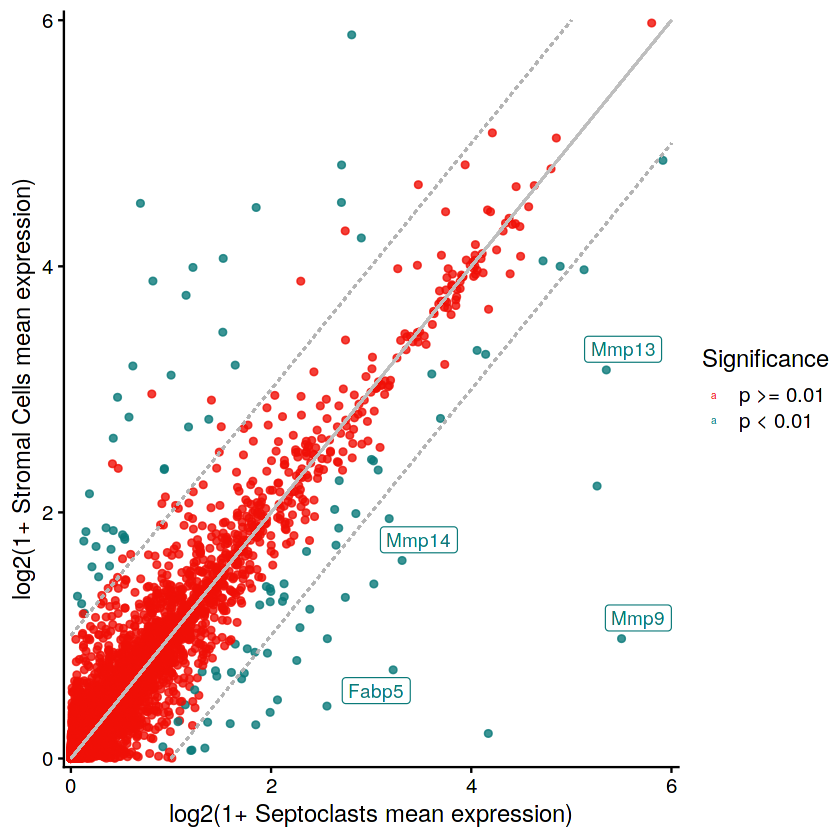

In [22]:
scatter_Plot <- ggplot(average_expression,aes(x=log2(1+ Septoclasts),y=log2(1+cluster_mean),label=gene,color=sig ) ) + geom_point(alpha=0.8) + theme_cowplot()  +
  scale_colour_manual(labels = c("p >= 0.01", "p < 0.01"),
                      name = "Significance",values=c("#F00F07","#0B7A79")) +
  guides(colour = guide_legend(override.aes = list(size=2)))+
  geom_segment(aes(x = 0, y = 0, xend = 6, yend = 6),
               colour = "grey")+labs(y= "log2(1+ Stromal Cells mean expression)", x = "log2(1+ Septoclasts mean expression)")+
  scale_x_continuous(expand = c(0.01, 0.01),limits = c(0,6)) +
  scale_y_continuous(expand = c(0.01, 0.01),limits = c(0,6))+
  geom_segment(aes(x = 0,xend=5, y = 1,yend=6),
            colour = "grey70",
            linetype = 2) +
  geom_segment(aes(x = 1,xend=6, y = 0,yend=5),
            colour = "grey70",
            linetype = 2) +
  geom_text(aes(x = 4, y = 5.5, label = ""),
            angle = 56) +
  geom_text(aes(x = 5.5, y = 4, label = ""),
            angle = 56)+
  geom_label_repel(data = average_expression %>% dplyr::filter(gene %in% goi),aes(label = gene),
                   
                   force = 1 )
ggsave(here::here(export.path_graphs,"Figure_3a.pdf"),scatter_Plot , width=5, height=5, limitsize=F)
scatter_Plot

## Figure 3c

In [23]:
library(ComplexHeatmap)
library(circlize)
average_expression <- (AverageExpression(seurat_stromal_subset, return.seurat = FALSE,assay="RNA",slot="data"))$RNA
average_expression_subset <- average_expression[c("Fabp5","Mmp9","Mmp13","Mmp14","Mmp11","Ece1","Adam19"),]
average_expression_subset_scaled <-  (scale(t(average_expression_subset)))

Loading required package: grid

ComplexHeatmap version 2.8.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))
! pheatmap() has been masked by ComplexHeatmap::pheatmap(). Most of the arguments
   in the original pheatmap() are identically supported in the new function. You 
   can still use the original function by explicitly calling pheatmap::pheatmap().



Attaching package: 'ComplexHeatmap'


The following object is masked from 'package:pheatmap

In [24]:
col_fun = colorRamp2(breaks=c(-2, 0, 2),colors= c("grey65","white","deepskyblue3"))
prismatic::color(col_fun(-2))

<colors>
#A6A6A6FF 

png 
  2

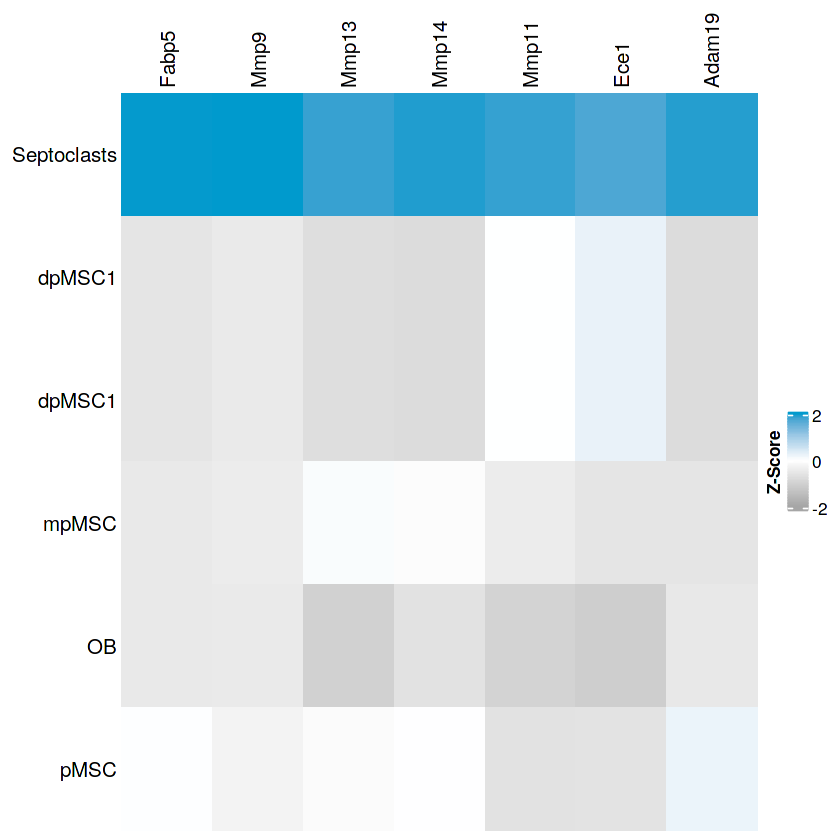

In [25]:

Figure3c <- Heatmap(average_expression_subset_scaled,
        name="Z-Score", 
        show_row_names = TRUE, 
        show_column_names = TRUE,
        row_order=c("Septoclasts","dpMSC1","dpMSC1","mpMSC","OB","pMSC"),
        heatmap_legend_param=list(direction="vertical",at = c(-2, 0, 2),title_position = "leftcenter-rot"),
        col=col_fun,
        column_order= c("Fabp5","Mmp9","Mmp13","Mmp14","Mmp11","Ece1","Adam19"), 
        column_names_rot = 90, 
        column_names_side = "top",
        row_names_side="left",
        border=FALSE)

pdf(file=here::here(export.path_graphs,"Figure_3c.pdf"),width=5,height=5)
draw( Figure3c , heatmap_legend_side = "right")
dev.off()

draw( Figure3c , heatmap_legend_side = "right")

## Figure 4b

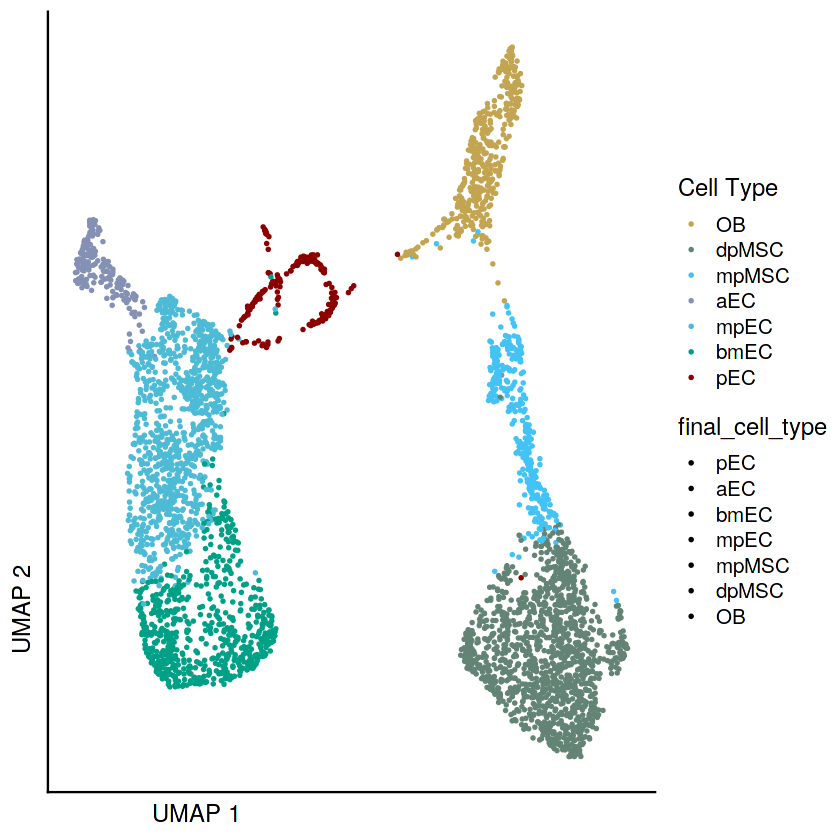

In [26]:
Figure_4b <- UMAP_Plot(seurat_stromal,
          pt.size=0.5,
          reduction="umap", 
          group.by="final_cell_type",
          split.by=NA,
          facet_labels=NA,
          border_col=NA,
          colors=stromal_cell_type_colors_reduced,
          legend=TRUE,
          tick_labels=FALSE,
          n.row=1,
          n.col=NA,
          x.axis_label=TRUE,
          y.axis_label=TRUE,
          x.axis_line=TRUE,
          y.axis_line=TRUE)

Figure_4b

ggsave(here::here(export.path_graphs,"Figure_4b.pdf"),Figure_4b, width=6, height=5, limitsize=F)

## Figure 4c

In [27]:
library(ComplexHeatmap)
library(circlize)

genes_of_interest <- c("Cxcl12","Adipoq","Esm1","Kitl","Lepr","Ramp2","Aplnr","Cd34","Ramp3","Egfl7","Fabp4","Stab2","Mrc1","Selp","Cd36","Bglap2","Col11a1","Car3","Col22a1","Bglap3","Kcnk2","Alpl","Wif1","Vcan","Olfml2b","Gja4","Egfl8","Gja5","Edn1","Sema3g","Mki67","Top2a","Birc5","Cdca8","Ccna2")

average_expression <- (AverageExpression(seurat_stromal, return.seurat = FALSE,assay="RNA",slot="data"))$RNA

average_expression_subset <- average_expression[genes_of_interest,]
average_expression_subset_scaled <-  t(scale(t(average_expression_subset)))

In [28]:
col_fun = colorRamp2(breaks=c(-2, 0, 2),colors= c("grey65","white","deepskyblue3"))
prismatic::color(col_fun(-2))

<colors>
#A6A6A6FF 

In [29]:
colnames(average_expression_subset_scaled)

[1] "pEC"   "aEC"   "bmEC"  "mpEC"  "mpMSC" "dpMSC" "OB"

png 
  2

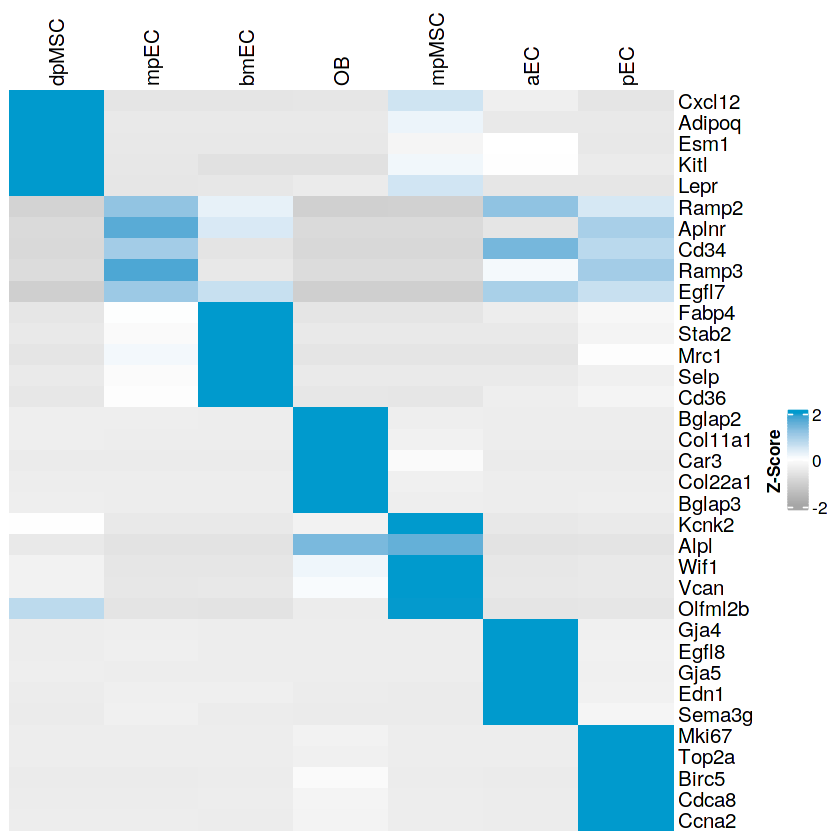

In [30]:

Figure_4c <- Heatmap(average_expression_subset_scaled,
        name="Z-Score", 
        show_row_names = TRUE, 
        show_column_names = TRUE,
        column_order=c("dpMSC","mpEC","bmEC","OB","mpMSC","aEC","pEC"),
        heatmap_legend_param=list(direction="vertical",at = c(-2, 0, 2),title_position = "leftcenter-rot"),
        col=col_fun,
        row_order= genes_of_interest, 
        column_names_rot = 90, 
        column_names_side = "top",
        row_names_side="right",
        border=FALSE)

pdf(file=here::here(export.path_graphs,"Figure_4c.pdf"),width=5,height=5)
draw( Figure_4c , heatmap_legend_side = "right")
dev.off()

draw( Figure_4c , heatmap_legend_side = "right")

## Figure 4d

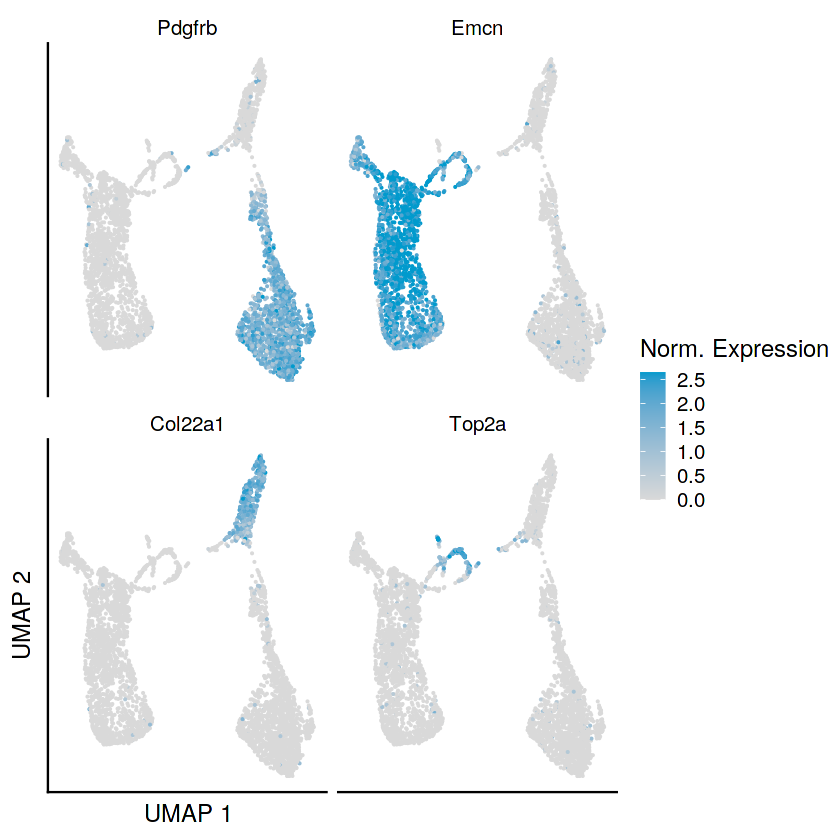

In [31]:
Figure_4d <- Feature_Plot(seurat_stromal,
                          pt.size=0.1,
                          scale.label="Norm. Expression",
                          features=c("Pdgfrb","Emcn","Col22a1","Top2a"),
                          split.by=NA,
                          legend=TRUE,
                          tick_labels=FALSE,
                          use_assay="RNA",
                          use_slot="data",
                          n.row=2,
                          n.col=2,
                          color_lower="grey85",
                          color_upper="deepskyblue3",
                          max.cutoff="q95",
                          min.cutoff=0,
                          reduction="umap")

ggsave(here::here(export.path_graphs,"Figure_4d.pdf"),Figure_4d, width=6, height=5, limitsize=F)

Figure_4d

## Figure 4e

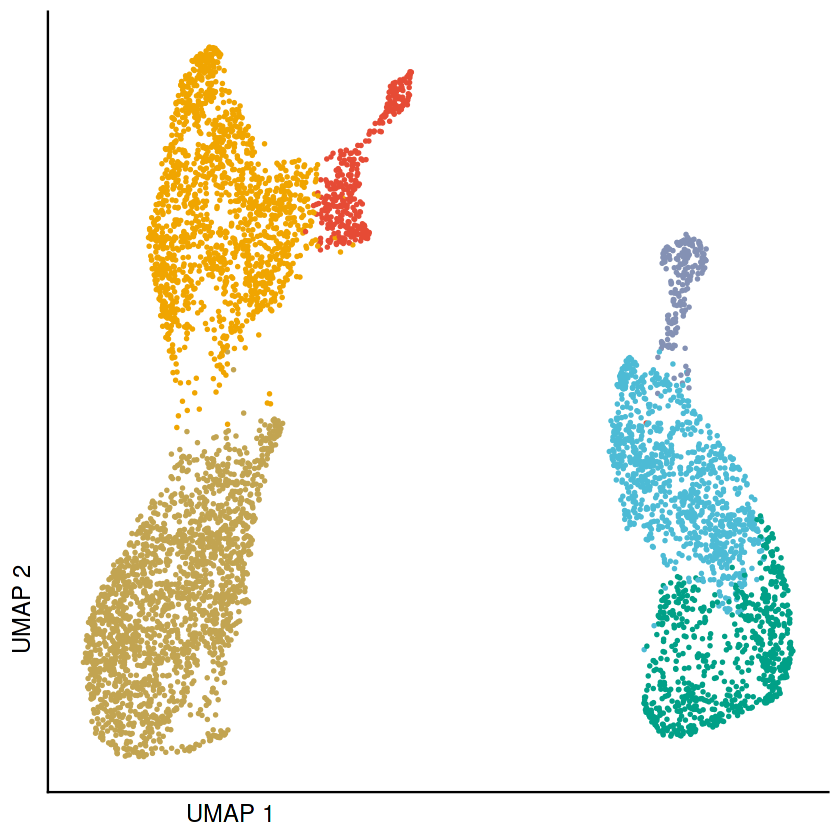

In [32]:
Figure_4e <- UMAP_Plot(seurat_all_integrated,
          pt.size=0.5,
          reduction="umap", 
          group.by="final_cell_type",
          split.by=NA,
          facet_labels=NA,
          border_col=NA,
          colors=merged_cell_type_colors,
          legend=FALSE,
          tick_labels=FALSE,
          n.row=1,
          n.col=NA,
          x.axis_label=TRUE,
          y.axis_label=TRUE,
          x.axis_line=TRUE,
          y.axis_line=TRUE)

Figure_4e

ggsave(here::here(export.path_graphs,"Figure_4e.pdf"),Figure_4e, width=5, height=5, limitsize=F)

## Figure 4f

In [33]:
library(ComplexHeatmap)
library(circlize)
average_expression <- (AverageExpression(seurat_all_integrated, return.seurat = FALSE,assay="RNA",slot="data"))$RNA
average_expression_subset <- average_expression[c("Mmp9","Mmp13","Mmp14","Mmp11"),]
average_expression_subset_scaled <-  (scale(t(average_expression_subset)))

In [34]:
col_fun = colorRamp2(breaks=c(-2, 0, 2),colors= c("grey65","white","deepskyblue3"))
prismatic::color(col_fun(-2))

<colors>
#A6A6A6FF 

In [35]:
colnames(average_expression)

data[, 1]Septoclasts         data[, 1]aEC        data[, 1]bmEC        data[, 1]mpEC       data[, 1]pvMSC  data[, 1]Bone Cells 
       "Septoclasts"                "aEC"               "bmEC"               "mpEC"              "pvMSC"         "Bone Cells"

png 
  2

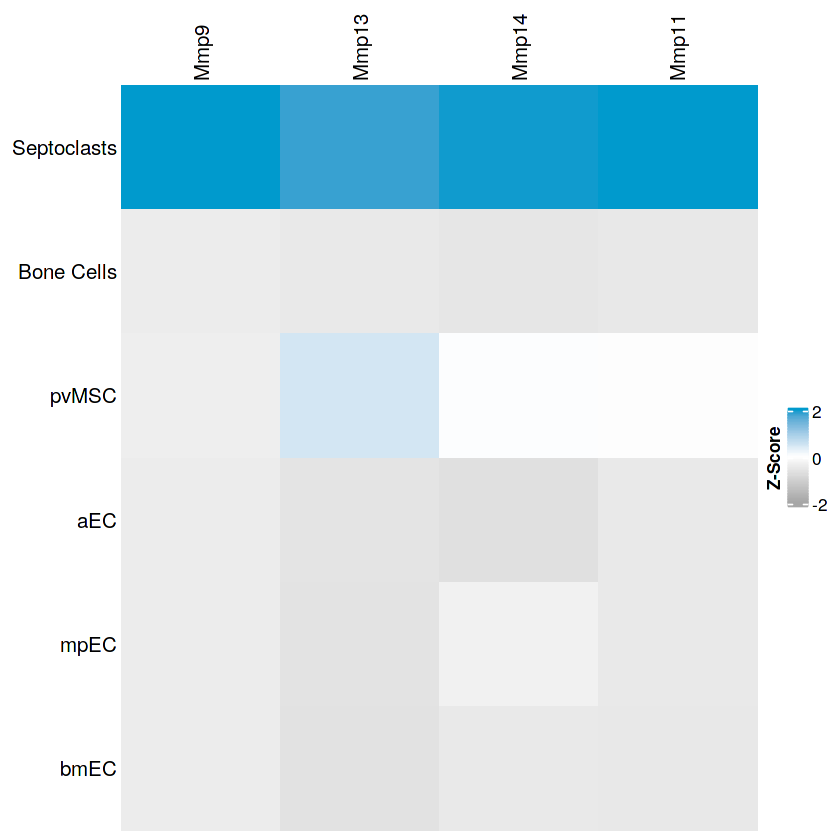

In [36]:

Figure4f <- Heatmap(average_expression_subset_scaled,
        name="Z-Score", 
        show_row_names = TRUE, 
        show_column_names = TRUE,
        row_order=c("Septoclasts","Bone Cells","pvMSC","aEC","mpEC","bmEC"),
        heatmap_legend_param=list(direction="vertical",at = c(-2, 0, 2),title_position = "leftcenter-rot"),
        col=col_fun,
        column_order= c("Mmp9","Mmp13","Mmp14","Mmp11"), 
        column_names_rot = 90, 
        column_names_side = "top",
        row_names_side="left",
        border=FALSE)

pdf(file=here::here(export.path_graphs,"Figure_4f.pdf"),width=5,height=5)
draw( Figure4f , heatmap_legend_side = "right")
dev.off()

draw( Figure4f , heatmap_legend_side = "right")

## Figure 4g

In [37]:
data <- GetAssayData(seurat_all_integrated,slot="data",assay="RNA")
data <- t( data[c("Hey1","Heyl"),,drop=FALSE] )
data <- as.data.frame(data)
meta_data <- seurat_all_integrated@meta.data %>% rownames_to_column("cell_name") %>% dplyr::select(cell_name,final_cell_type)

In [38]:
data_interest <- data %>% tibble::rownames_to_column(var="cell_name") %>% pivot_longer(cols=c("Hey1","Heyl"),names_to="feature",values_to="counts") %>% left_join(meta_data)
data_interest %>% head()

Joining, by = "cell_name"



cell_name          feature counts    final_cell_type
1 AAACCCATCATGAGTC_1 Hey1    1.0553935 pvMSC          
2 AAACCCATCATGAGTC_1 Heyl    0.0000000 pvMSC          
3 AAACCCATCCTTCTGG_1 Hey1    0.9154836 pvMSC          
4 AAACCCATCCTTCTGG_1 Heyl    0.0000000 pvMSC          
5 AAACGAAAGAATTCAG_1 Hey1    0.9202615 Septoclasts    
6 AAACGAAAGAATTCAG_1 Heyl    0.0000000 Septoclasts

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


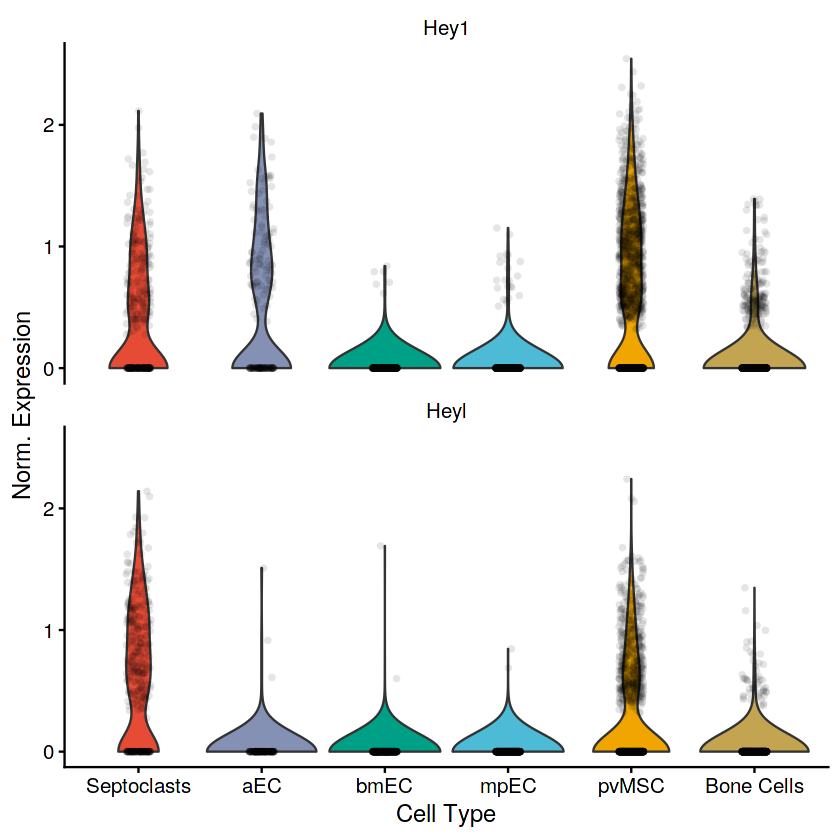

In [39]:
Figure_4g <- ggplot(data_interest, aes(x=final_cell_type, y=counts,fill=final_cell_type))+ 
      geom_violin(bw=0.15)+ 
      theme_cowplot()+ 
      ylab("Expression Level") + 
      geom_jitter(shape=16, position=position_jitter(0.1),alpha=0.1,color="black")+ 
      labs(x="Cell Type",y="Norm. Expression") + scale_fill_manual(values=merged_cell_type_colors) + facet_wrap(~feature,
  nrow = 2,
  ncol = 1) +
  theme(strip.background =element_blank())+guides(fill=FALSE)
               

ggsave(here::here(export.path_graphs,"Figure_4g.pdf"),Figure_4g, width=5, height=5, limitsize=F)


Figure_4g                                        

## Figure 4h

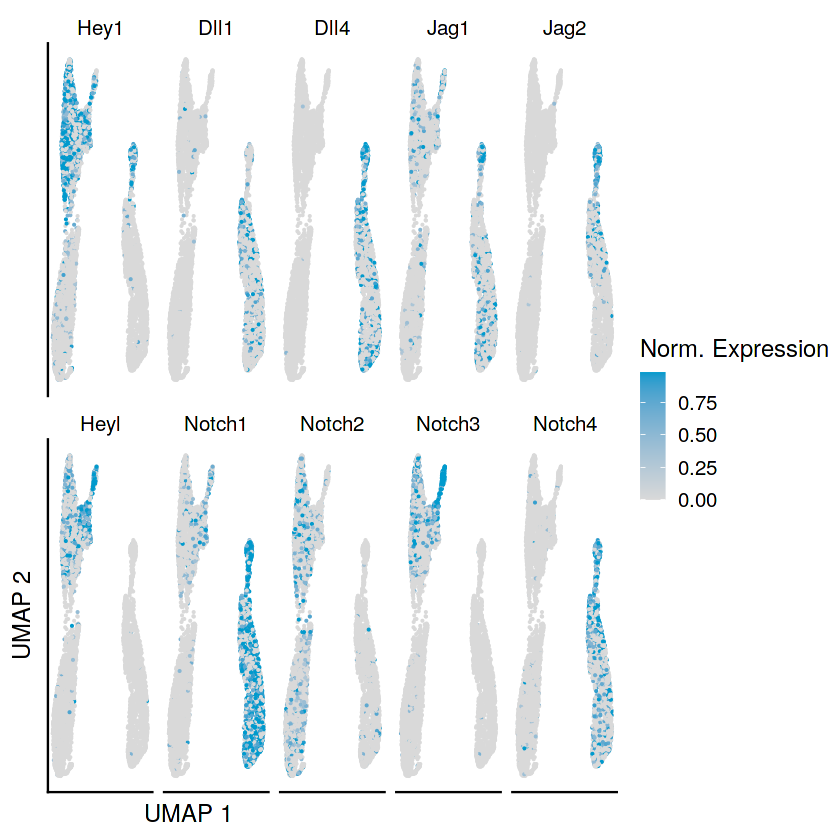

In [40]:
Figure_4h <- Feature_Plot(seurat_all_integrated,
                          pt.size=0.1,
                          scale.label="Norm. Expression",
                          features=c("Hey1","Dll1","Dll4","Jag1","Jag2","Heyl","Notch1","Notch2","Notch3","Notch4"),
                          split.by=NA,
                          legend=TRUE,
                          tick_labels=FALSE,
                          use_assay="RNA",
                          use_slot="data",
                          n.row=2,
                          n.col=5,
                          color_lower="grey85",
                          color_upper="deepskyblue3",
                          max.cutoff="q95",
                          min.cutoff=0,
                          reduction="umap")

Figure_4h

ggsave(here::here(export.path_graphs,"Figure_4h.pdf"),Figure_4h, width=25, height=10, limitsize=F)

# Supplementary Figures

## Supplementary Figure 4b

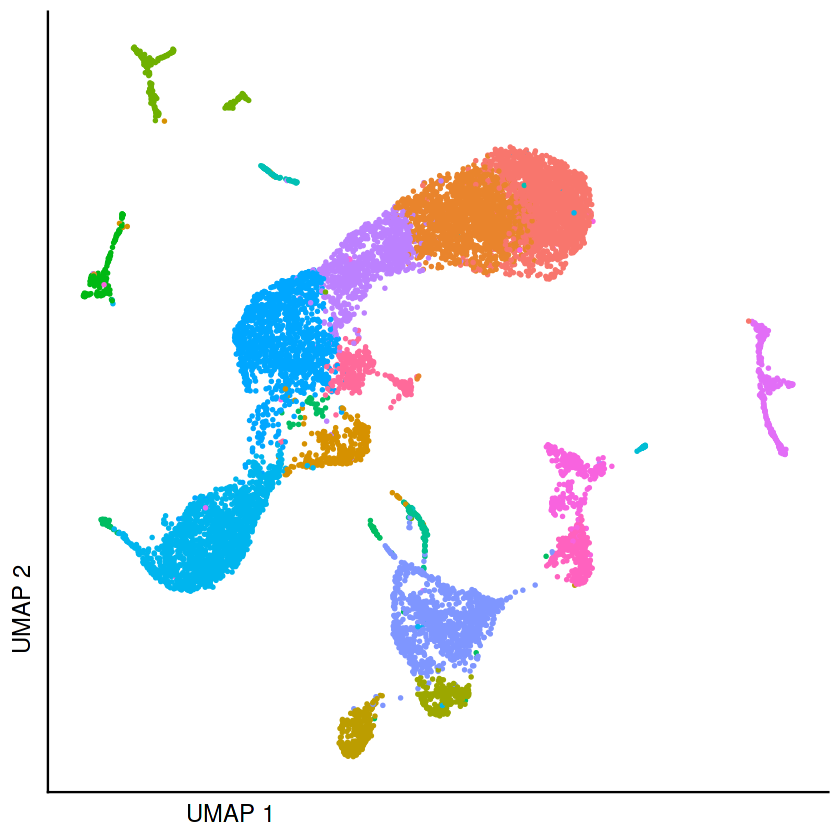

In [41]:
color_palette <- hue_pal()(length(unique(seurat_septoclasts@meta.data$final_clusters)))

Supp_Figure_4b <- UMAP_Plot(seurat_septoclasts,
          pt.size=0.5,
          reduction="umap", 
          group.by="final_clusters",
          split.by=NA,
          facet_labels=NA,
          border_col=NA,
          colors=color_palette,
          legend=FALSE,
          tick_labels=FALSE,
          n.row=1,
          n.col=NA,
          x.axis_label=TRUE,
          y.axis_label=TRUE,
          x.axis_line=TRUE,
          y.axis_line=TRUE)

Supp_Figure_4b

ggsave(here::here(export.path_graphs,"Supp_Figure_4b.pdf"),Supp_Figure_4b, width=5, height=5, limitsize=F)

## Supplementary Figure 4c

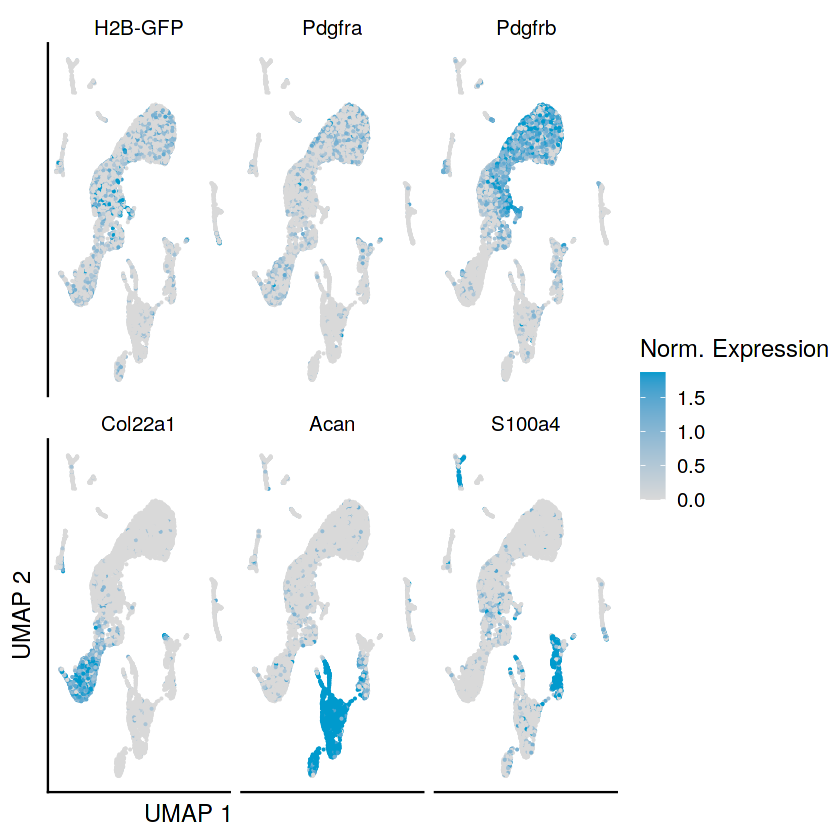

In [42]:
SuppFigure_4c <- Feature_Plot(seurat_septoclasts,
                          pt.size=0.1,
                          scale.label="Norm. Expression",
                          features=c("H2B-GFP","Pdgfra","Pdgfrb","Col22a1","Acan","S100a4"),
                          split.by=NA,
                          legend=TRUE,
                          tick_labels=FALSE,
                          use_assay="RNA",
                          use_slot="data",
                          n.row=2,
                          n.col=3,
                          color_lower="grey85",
                          color_upper="deepskyblue3",
                          max.cutoff="q95",
                          min.cutoff=0,
                          reduction="umap")

SuppFigure_4c

ggsave(here::here(export.path_graphs,"SuppFigure_4c.pdf"),SuppFigure_4c, width=15, height=10, limitsize=F)

## Supplementary Figure 4d

In [43]:
library(ComplexHeatmap)
library(circlize)

genes_of_interest <- c("Mmp9","Sstr2","Cd55","Cotl1","Fabp5","Esm1","Kitl","Adipoq","Lepr","Cxcl12","Wif1","Limch1","Postn","Kcnk2","Alpl","Bglap2","Bglap3","Col22a1","Col11a1","Car3","Top2a","Mki67","Birc5","Ccnb2","Cdk1")

average_expression <- (AverageExpression(seurat_stromal_subset, return.seurat = FALSE,assay="RNA",slot="data"))$RNA
average_expression_subset <- average_expression[genes_of_interest,]
average_expression_subset_scaled <-  t(scale(t(average_expression_subset)))

In [44]:
col_fun = colorRamp2(breaks=c(-2, 0, 2),colors= c("grey65","white","deepskyblue3"))
prismatic::color(col_fun(-2))

<colors>
#A6A6A6FF 

In [45]:
colnames(average_expression_subset_scaled)

[1] "dpMSC1"      "dpMSC2"      "mpMSC"       "Septoclasts" "pMSC"        "OB"

png 
  2

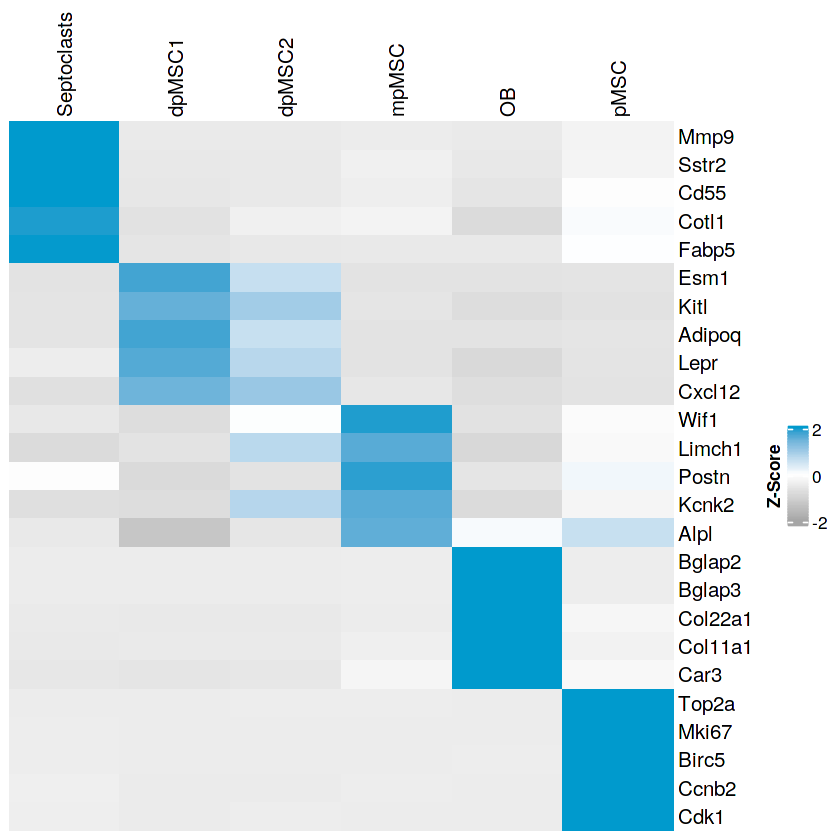

In [46]:

SuppFigure4d <- Heatmap(average_expression_subset_scaled,
        name="Z-Score", 
        show_row_names = TRUE, 
        show_column_names = TRUE,
        column_order=c("Septoclasts","dpMSC1","dpMSC2","mpMSC","OB","pMSC"),
        heatmap_legend_param=list(direction="vertical",at = c(-2, 0, 2),title_position = "leftcenter-rot"),
        col=col_fun,
        row_order= genes_of_interest, 
        column_names_rot = 90, 
        column_names_side = "top",
        row_names_side="right",
        border=FALSE)

pdf(file=here::here(export.path_graphs,"SuppFigure_4d.pdf"),width=5,height=5)
draw( SuppFigure4d , heatmap_legend_side = "right")
dev.off()

draw( SuppFigure4d , heatmap_legend_side = "right")

## Supplementary Figure 4e

In [47]:
library(monocle)
cds_stromal <- readRDS(file=paste0(export.path_objects,"/Monocle2_Septoclast_subset.Rds"))

Scale for 'colour' is already present. Adding another scale for 'colour', which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour', which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour', which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour', which will replace the existing scale.



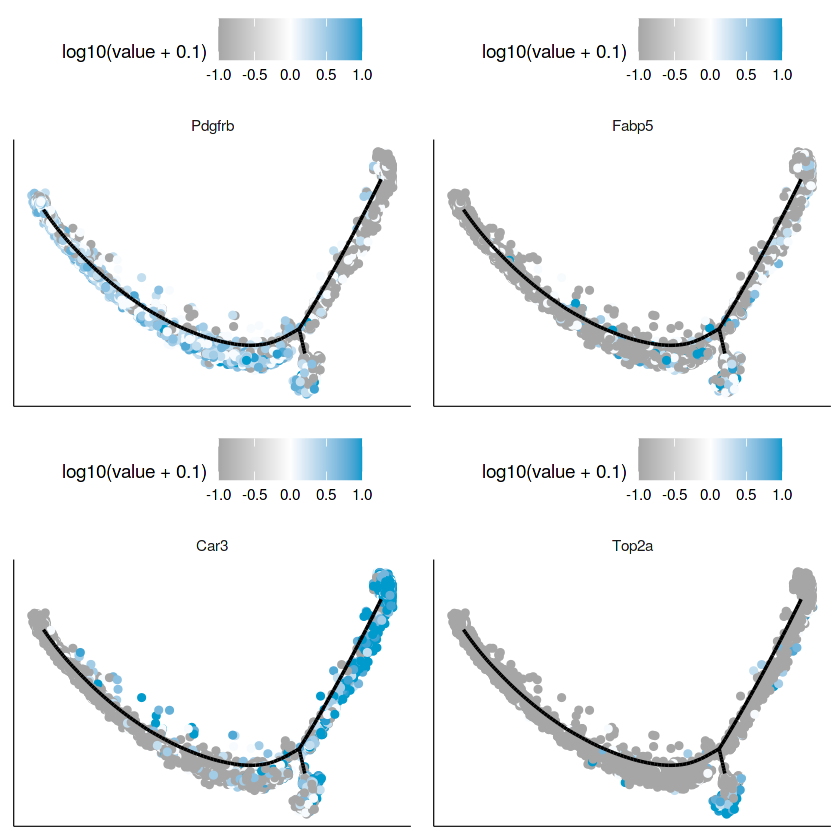

In [48]:
combined_monocle_trajectory_genes <- plot_grid(
    plot_cell_trajectory(cds_stromal,theta = 180,use_color_gradient=TRUE,markers="Pdgfrb",show_branch_points=FALSE) +
      scale_colour_gradient2(low="grey65",high="deepskyblue3",mid="white",midpoint=0,limits=c(-1,1),oob=squish)+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()),
    plot_cell_trajectory(cds_stromal,theta = 180,use_color_gradient=TRUE,markers="Fabp5",show_branch_points=FALSE) +
      scale_colour_gradient2(low="grey65",high="deepskyblue3",mid="white",midpoint=0,limits=c(-1,1),oob=squish)+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()),
    plot_cell_trajectory(cds_stromal,theta = 180,use_color_gradient=TRUE,markers="Car3",show_branch_points=FALSE) +
      scale_colour_gradient2(low="grey65",high="deepskyblue3",mid="white",midpoint=0,limits=c(-1,1),oob=squish)+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()),
    plot_cell_trajectory(cds_stromal,theta = 180,use_color_gradient=TRUE,markers="Top2a",show_branch_points=FALSE) +
      scale_colour_gradient2(low="grey65",high="deepskyblue3",mid="white",midpoint=0,limits=c(-1,1),oob=squish)+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()),
    nrow=2,ncol=2
    )



ggsave(here::here(export.path_graphs,"SuppFigure_4e.pdf"),combined_monocle_trajectory_genes , width=10, height=10, limitsize=F)


combined_monocle_trajectory_genes

## Supplementary Figure 6c

In [49]:
library(ComplexHeatmap)
library(circlize)

genes_of_interest <- c("Fabp5","Ctsb","Mmp9","Mmp11","Mmp13","Mmp14","Ece1","Adam19","Rhod","Rhoj","Tubb2a","Myh9","Vasp","Fn1","Lama4","Itgb5","Itgav","Actn1","Tln1","Flna")

average_expression <- (AverageExpression(seurat_stromal_subset, return.seurat = FALSE,assay="RNA",slot="data"))$RNA
average_expression_subset <- average_expression[genes_of_interest,]
average_expression_subset_scaled <-  t(scale(t(average_expression_subset)))

In [50]:
col_fun = colorRamp2(breaks=c(-2, 0, 2),colors= c("grey65","white","deepskyblue3"))
prismatic::color(col_fun(-2))

<colors>
#A6A6A6FF 

In [51]:
colnames(average_expression_subset_scaled)

[1] "dpMSC1"      "dpMSC2"      "mpMSC"       "Septoclasts" "pMSC"        "OB"

png 
  2

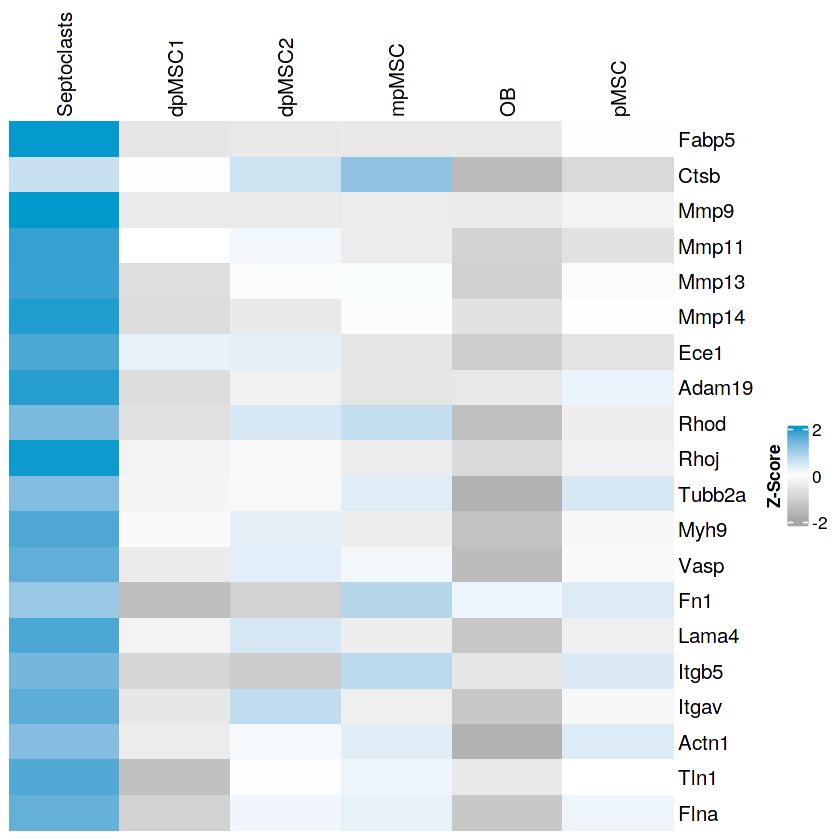

In [52]:

SuppFigure6c <- Heatmap(average_expression_subset_scaled,
        name="Z-Score", 
        show_row_names = TRUE, 
        show_column_names = TRUE,
        column_order=c("Septoclasts","dpMSC1","dpMSC2","mpMSC","OB","pMSC"),
        heatmap_legend_param=list(direction="vertical",at = c(-2, 0, 2),title_position = "leftcenter-rot"),
        col=col_fun,
        row_order= genes_of_interest, 
        column_names_rot = 90, 
        column_names_side = "top",
        row_names_side="right",
        border=FALSE)

pdf(file=here::here(export.path_graphs,"SuppFigure_6c.pdf"),width=5,height=5)
draw( SuppFigure6c , heatmap_legend_side = "right")
dev.off()

draw( SuppFigure6c , heatmap_legend_side = "right")

## Supplementary Figure 8a

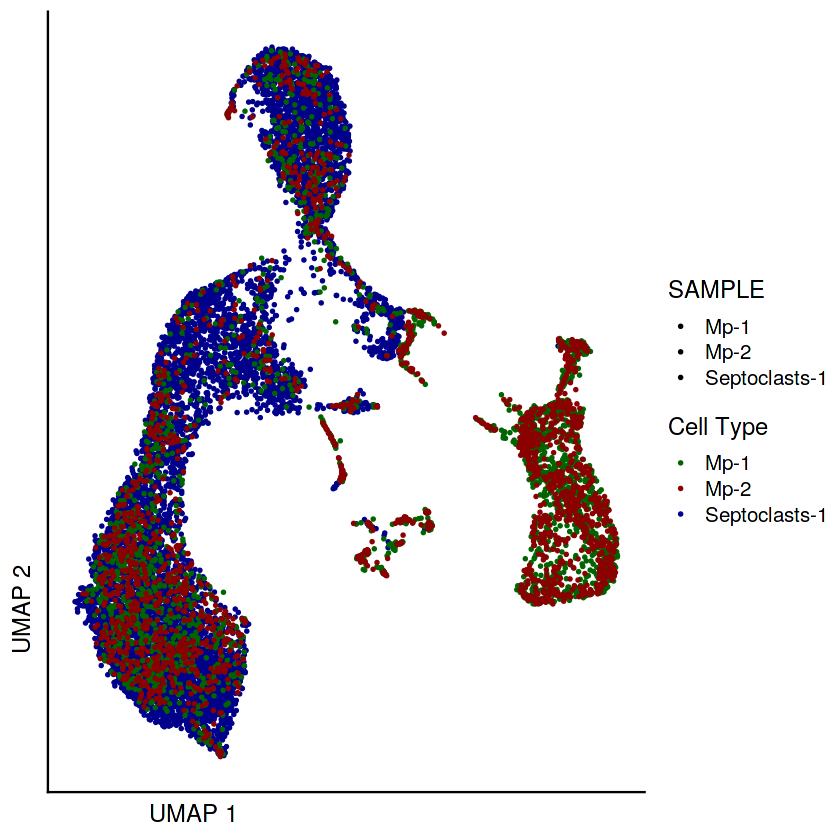

In [54]:
SuppFigure_8a <- UMAP_Plot(seurat_merged_all,
          pt.size=0.5,
          reduction="umap", 
          group.by="SAMPLE",
          split.by=NA,
          facet_labels=NA,
          border_col=NA,
          colors=c("darkgreen","darkred","darkblue"),
          legend=TRUE,
          tick_labels=FALSE,
          n.row=1,
          n.col=NA,
          x.axis_label=TRUE,
          y.axis_label=TRUE,
          x.axis_line=TRUE,
          y.axis_line=TRUE)

SuppFigure_8a

ggsave(here::here(export.path_graphs,"SuppFigure_8a.pdf"),SuppFigure_8a, width=5, height=5, limitsize=F)

## Supplementary Figure 8b

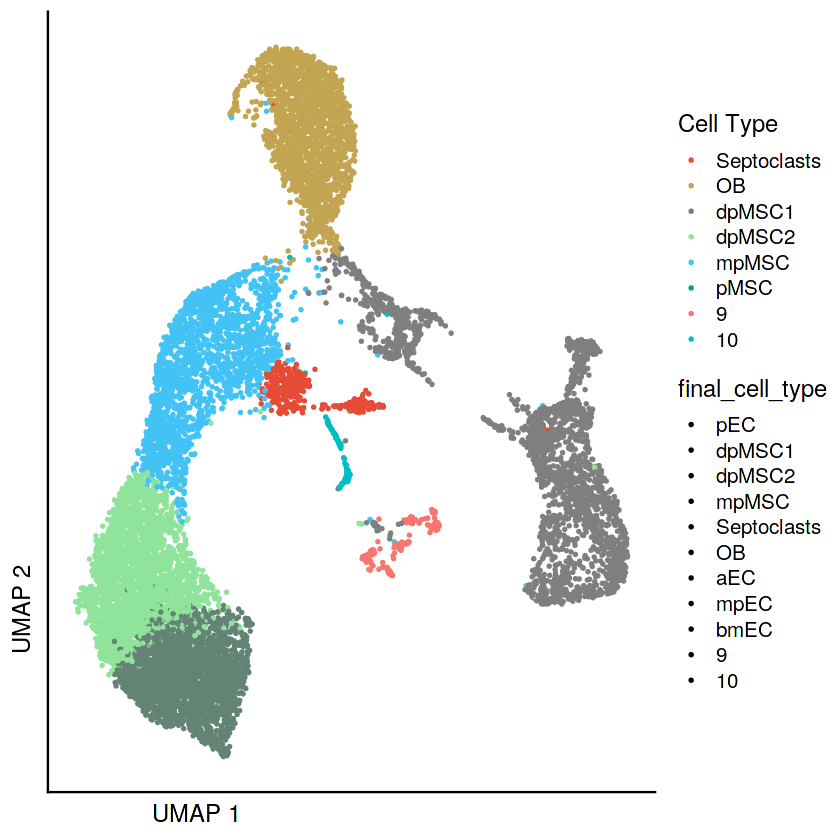

In [55]:
color_palette <- hue_pal()(2)

color_palette <- c(stromal_cell_type_colors,"9"=color_palette[[1]],"10"=color_palette[[2]])

SuppFigure_8b <- UMAP_Plot(seurat_merged_all,
          pt.size=0.5,
          reduction="umap", 
          group.by="final_cell_type",
          split.by=NA,
          facet_labels=NA,
          border_col=NA,
          colors=color_palette,
          legend=TRUE,
          tick_labels=FALSE,
          n.row=1,
          n.col=NA,
          x.axis_label=TRUE,
          y.axis_label=TRUE,
          x.axis_line=TRUE,
          y.axis_line=TRUE)

SuppFigure_8b

ggsave(here::here(export.path_graphs,"SuppFigure_8b.pdf"),SuppFigure_8b, width=5, height=5, limitsize=F)

## Supplementary Figure 8c

As can be seen by the marker stainings, the Cluster annotated as pEC, might also contain doublets and not just proliferating EC. The majority however, seem to be cycling Endothelial Cells

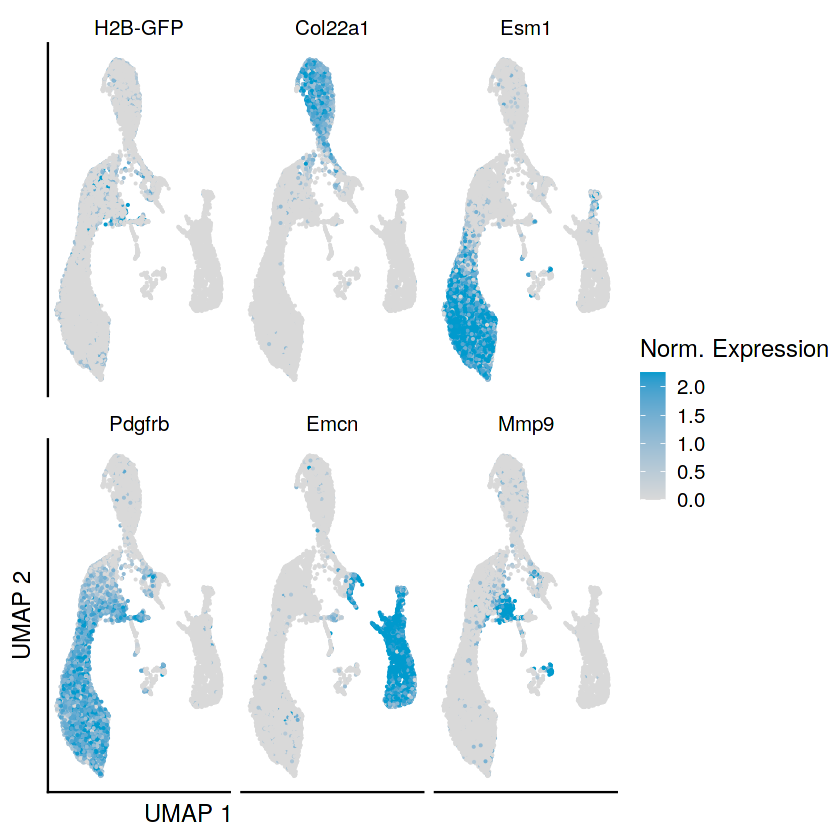

In [56]:
SuppFigure_8c <- Feature_Plot(seurat_merged_all,
                          pt.size=0.1,
                          scale.label="Norm. Expression",
                          features=c("H2B-GFP","Col22a1","Esm1","Pdgfrb","Emcn","Mmp9"),
                          split.by=NA,
                          legend=TRUE,
                          tick_labels=FALSE,
                          use_assay="RNA",
                          use_slot="data",
                          n.row=2,
                          n.col=3,
                          color_lower="grey85",
                          color_upper="deepskyblue3",
                          max.cutoff="q95",
                          min.cutoff=0,
                          reduction="umap")

SuppFigure_8c

ggsave(here::here(export.path_graphs,"SuppFigure_8c.pdf"),SuppFigure_8c, width=5, height=5, limitsize=F)

## Supplementary Figure 8d

In [57]:
library(ComplexHeatmap)
library(circlize)

genes_of_interest <- c("Bglap","Bglap2","Col22a1","Car3","Gja4","Cav1","Egfl8","Sema3g","Car7","Sstr2","Mmp9","Fabp5","Egfr","Fbln1","Stab2","Rgs4","Cyp4b1","Flt4","Tnc","Wif1","Postn","Alpl","Kcnk2","Aplnr","Prcp","Ramp3","Ednrb","Apln")

average_expression <- (AverageExpression(seurat_all_integrated, return.seurat = FALSE,assay="RNA",slot="data"))$RNA
average_expression_subset <- average_expression[genes_of_interest,]
average_expression_subset_scaled <-  t(scale(t(average_expression_subset)))

In [58]:
col_fun = colorRamp2(breaks=c(-2, 0, 2),colors= c("grey65","white","deepskyblue3"))
prismatic::color(col_fun(-2))

<colors>
#A6A6A6FF 

In [59]:
colnames(average_expression_subset_scaled)

[1] "Septoclasts" "aEC"         "bmEC"        "mpEC"        "pvMSC"       "Bone Cells"

png 
  2

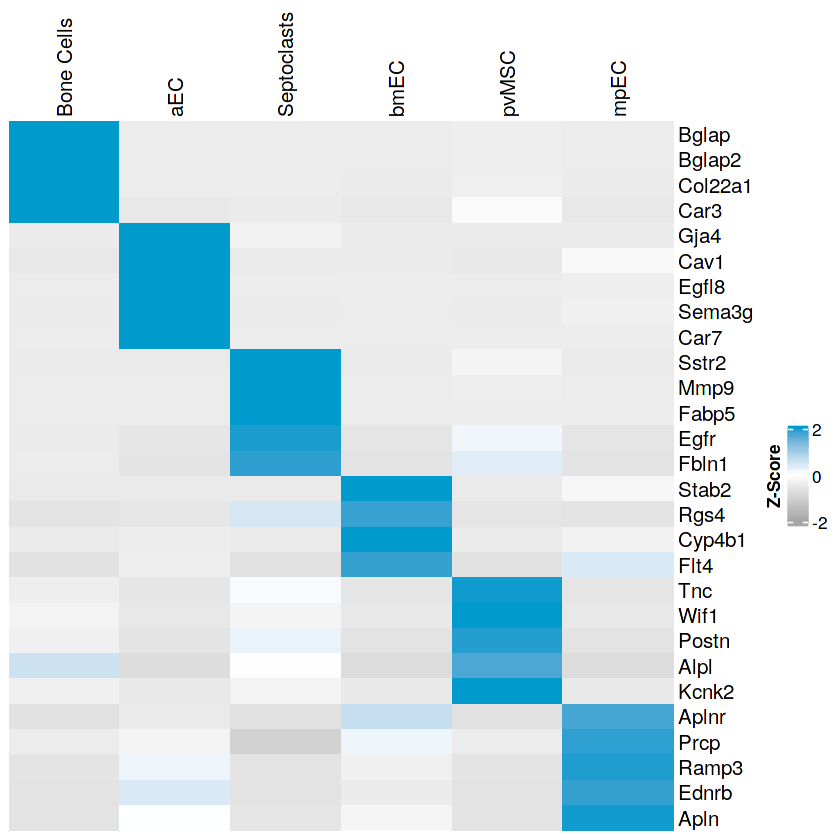

In [60]:

SuppFigure8d <- Heatmap(average_expression_subset_scaled,
        name="Z-Score", 
        show_row_names = TRUE, 
        show_column_names = TRUE,
        column_order=c("Bone Cells","aEC","Septoclasts","bmEC","pvMSC","mpEC"),
        heatmap_legend_param=list(direction="vertical",at = c(-2, 0, 2),title_position = "leftcenter-rot"),
        col=col_fun,
        row_order= genes_of_interest, 
        column_names_rot = 90, 
        column_names_side = "top",
        row_names_side="right",
        border=FALSE)

pdf(file=here::here(export.path_graphs,"SuppFigure_8d.pdf"),width=5,height=5)
draw( SuppFigure8d , heatmap_legend_side = "right")
dev.off()

draw( SuppFigure8d , heatmap_legend_side = "right")

## Supplementary Figure 8e

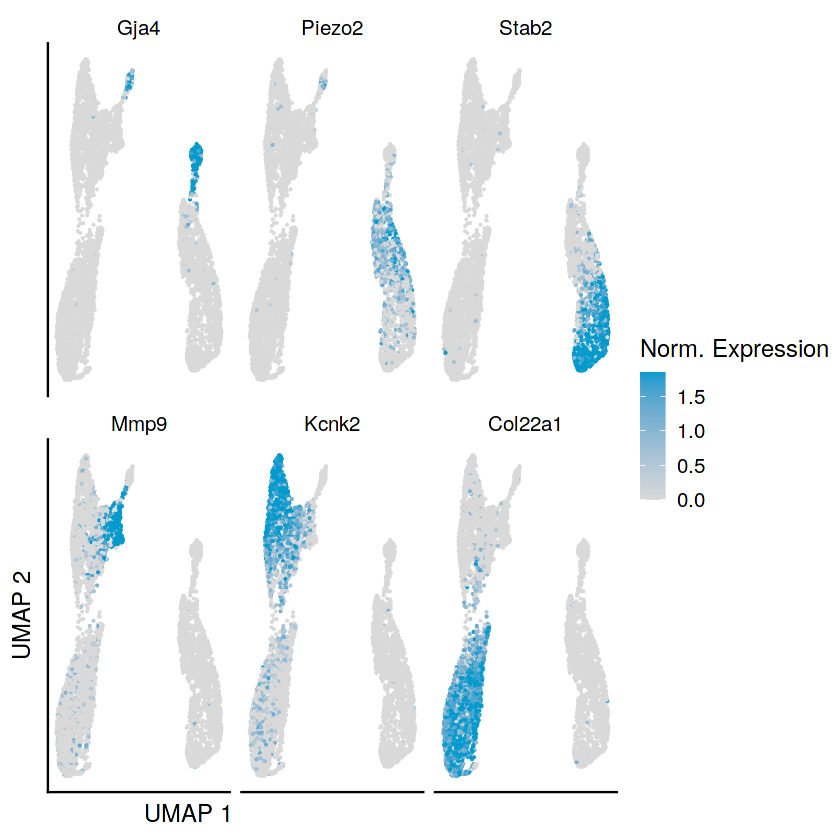

In [61]:
SuppFigure_8e <- Feature_Plot(seurat_all_integrated,
                          pt.size=0.1,
                          scale.label="Norm. Expression",
                          features=c("Gja4","Piezo2","Stab2","Mmp9","Kcnk2","Col22a1"),
                          split.by=NA,
                          legend=TRUE,
                          tick_labels=FALSE,
                          use_assay="RNA",
                          use_slot="data",
                          n.row=2,
                          n.col=3,
                          color_lower="grey85",
                          color_upper="deepskyblue3",
                          max.cutoff="q95",
                          min.cutoff=0,
                          reduction="umap")

SuppFigure_8e

ggsave(here::here(export.path_graphs,"SuppFigure_8e.pdf"),SuppFigure_8e, width=5, height=5, limitsize=F)

# Further Figures

## Unfiltered Septoclast Dataset Markers

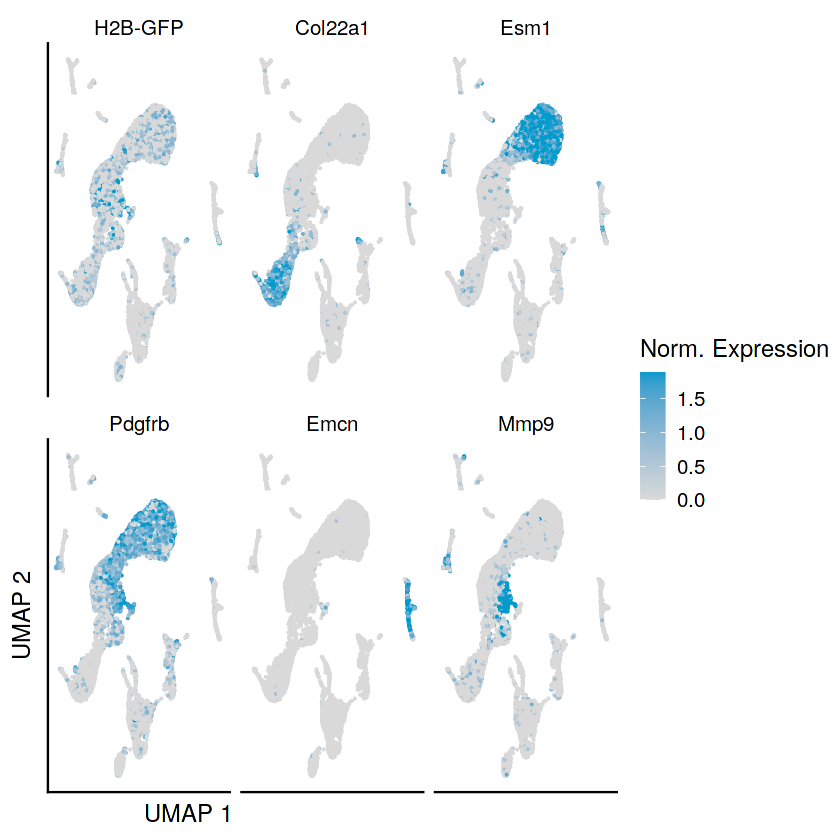

In [62]:
Septoclast_Markers <- Feature_Plot(seurat_septoclasts,
                          pt.size=0.1,
                          scale.label="Norm. Expression",
                          features=c("H2B-GFP","Col22a1","Esm1","Pdgfrb","Emcn","Mmp9"),
                          split.by=NA,
                          legend=TRUE,
                          tick_labels=FALSE,
                          use_assay="RNA",
                          use_slot="data",
                          n.row=2,
                          n.col=3,
                          color_lower="grey85",
                          color_upper="deepskyblue3",
                          max.cutoff="q95",
                          min.cutoff=0,
                          reduction="umap")

Septoclast_Markers

## Merged Subset Notch Expression

In [63]:
library(ComplexHeatmap)
library(circlize)

genes_of_interest <- c("Dll1","Dll4","Jag1","Notch1","Notch3")

average_expression <- (AverageExpression(seurat_all_integrated, return.seurat = FALSE,assay="RNA",slot="data"))$RNA
average_expression_subset <- average_expression[genes_of_interest,]
average_expression_subset_scaled <-  t(scale(t(average_expression_subset)))

In [64]:
col_fun = colorRamp2(breaks=c(-2, 0, 2),colors= c("grey65","white","deepskyblue3"))
prismatic::color(col_fun(-2))

<colors>
#A6A6A6FF 

In [65]:
colnames(average_expression_subset_scaled)

[1] "Septoclasts" "aEC"         "bmEC"        "mpEC"        "pvMSC"       "Bone Cells"

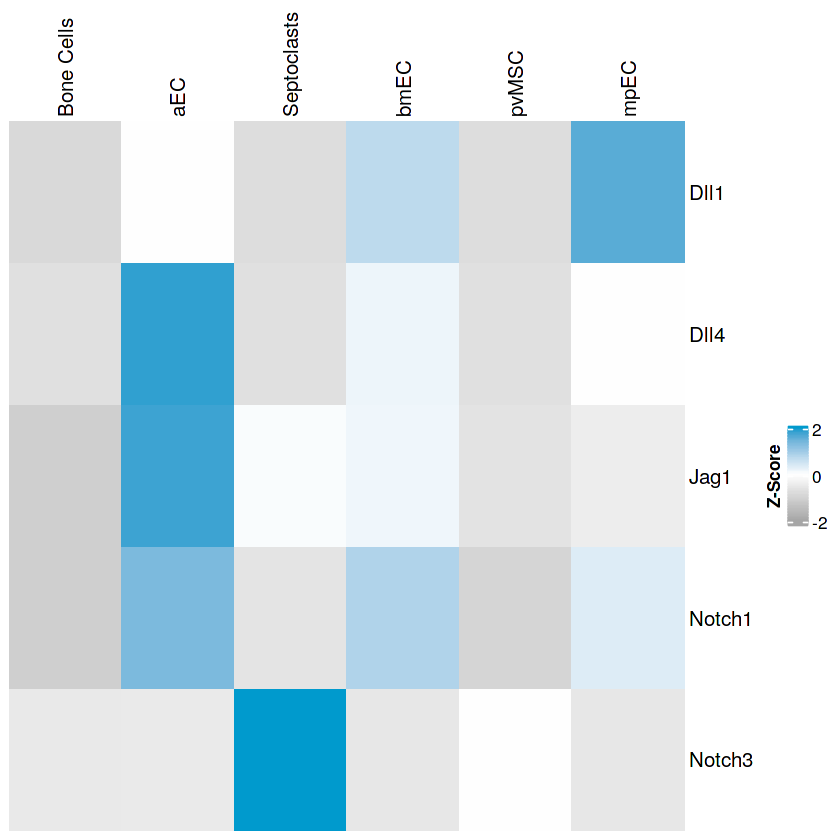

In [66]:

Notch_Expression <- Heatmap(average_expression_subset_scaled,
        name="Z-Score", 
        show_row_names = TRUE, 
        show_column_names = TRUE,
        column_order=c("Bone Cells","aEC","Septoclasts","bmEC","pvMSC","mpEC"),
        heatmap_legend_param=list(direction="vertical",at = c(-2, 0, 2),title_position = "leftcenter-rot"),
        col=col_fun,
        row_order= genes_of_interest, 
        column_names_rot = 90, 
        column_names_side = "top",
        row_names_side="right",
        border=FALSE)

Notch_Expression

## Merged Subset Markers

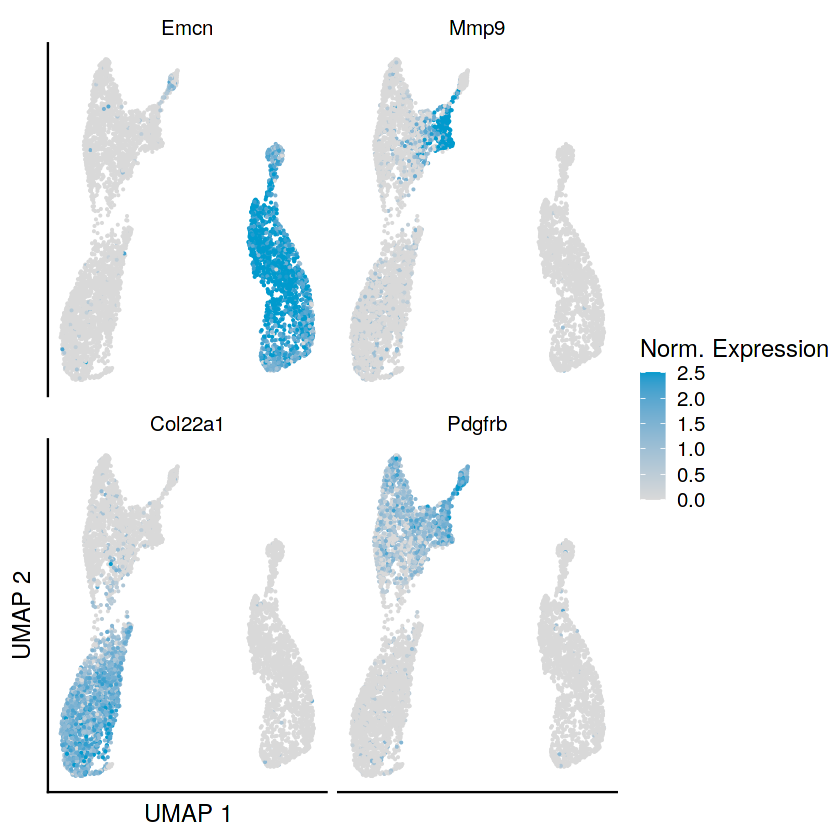

In [67]:
Merged_Subset_Markers <- Feature_Plot(seurat_all_integrated,
                          pt.size=0.1,
                          scale.label="Norm. Expression",
                          features=c("Emcn","Mmp9","Col22a1","Pdgfrb"),
                          split.by=NA,
                          legend=TRUE,
                          tick_labels=FALSE,
                          use_assay="RNA",
                          use_slot="data",
                          n.row=2,
                          n.col=2,
                          color_lower="grey85",
                          color_upper="deepskyblue3",
                          max.cutoff="q95",
                          min.cutoff=0,
                          reduction="umap")

Merged_Subset_Markers

## All Merged Cell Cycle

In [68]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
seurat_merged_all <- CellCycleScoring(seurat_merged_all, s.features = s.genes, g2m.features = g2m.genes, set.ident = FALSE)
colnames(seurat_merged_all@meta.data)

Warning message:
"The following features are not present in the object: MCM5, PCNA, TYMS, FEN1, MCM2, MCM4, RRM1, UNG, GINS2, MCM6, CDCA7, DTL, PRIM1, UHRF1, MLF1IP, HELLS, RFC2, RPA2, NASP, RAD51AP1, GMNN, WDR76, SLBP, CCNE2, UBR7, POLD3, MSH2, ATAD2, RAD51, RRM2, CDC45, CDC6, EXO1, TIPIN, DSCC1, BLM, CASP8AP2, USP1, CLSPN, POLA1, CHAF1B, BRIP1, E2F8, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: HMGB2, CDK1, NUSAP1, UBE2C, BIRC5, TPX2, TOP2A, NDC80, CKS2, NUF2, CKS1B, MKI67, TMPO, CENPF, TACC3, FAM64A, SMC4, CCNB2, CKAP2L, CKAP2, AURKB, BUB1, KIF11, ANP32E, TUBB4B, GTSE1, KIF20B, HJURP, CDCA3, HN1, CDC20, TTK, CDC25C, KIF2C, RANGAP1, NCAPD2, DLGAP5, CDCA2, CDCA8, ECT2, KIF23, HMMR, AURKA, PSRC1, ANLN, LBR, CKAP5, CENPE, CTCF, NEK2, G2E3, GAS2L3, CBX5, CENPA, not searching for symbol synonyms"
Warning message in AddModuleScore(object = object, features = features, name = name, :
"Could not find enough features in the object 

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"           "nCount_spliced"         "nFeature_spliced"       "nCount_unspliced"       "nFeature_unspliced"     "log10GenesPerUMI"       "mito_percent"           "ribo_percent"           "hb_percent"             "mito_ratio"             "low.lib_mads"           "nfeat_outlier"          "mito_outlier"           "ribo_outlier"           "hb_outlier"             "SAMPLE"                 "GROUP"                  "RNA_snn_res.0.6"        "seurat_clusters"        "final_clusters"         "RNA_snn_res.0.3"        "final_cell_type"        "integrated_snn_res.0.4" "S.Score"                "G2M.Score"              "Phase"

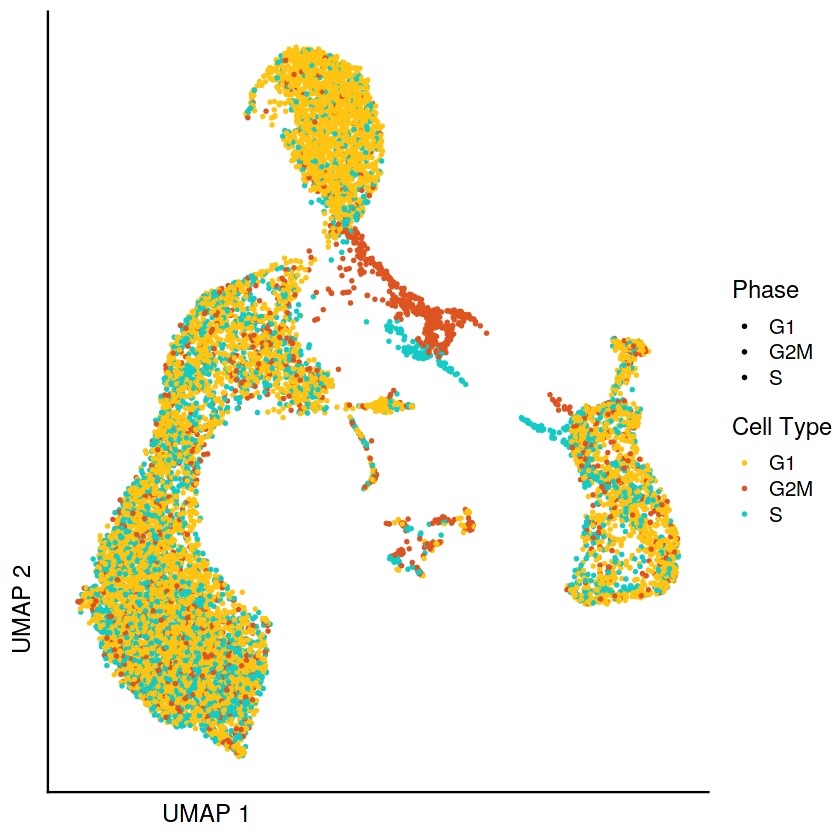

In [69]:
all_merged_cellcycle <- UMAP_Plot(seurat_merged_all,
          pt.size=0.5,
          reduction="umap", 
          group.by="Phase",
          split.by=NA,
          facet_labels=NA,
          border_col=NA,
          colors=cell_cycle_cols,
          legend=TRUE,
          tick_labels=FALSE,
          n.row=1,
          n.col=NA,
          x.axis_label=TRUE,
          y.axis_label=TRUE,
          x.axis_line=TRUE,
          y.axis_line=TRUE)

all_merged_cellcycle